In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
# Set pandas display options to show up to 100 rows
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)

In [3]:
data = pd.read_csv('data/upper/ALLSLDU_DP05_AL.csv', dtype={'Line Number': str})

#### Between the 2021 ACS Demographic Profiles and the 2022 State Legislative District ACS 5-year estimates, the titles of some columns were slightly changed, so I returned the column names to their old titles in order for the data to be processed with the same code from my previous project. I checked after processing each profile that the titles of each feature were identical, which they were. 

In [4]:
# Load in Alabama DEMOGRAPHIC file for all districts

data.rename(columns={
    'GEONAME': 'District',
    'Line Number': 'PROFLN',
    'Title':'TITLE',
    'Estimate': 'PRF_ESTIMATE',
    'Percent Estimate':'PCT_ESTIMATE', 
    'Margin of Error': 'PRF_MG_ERROR',
    'Percent Margin of Error': 'PCT_MG_ERROR'
}, inplace=True)


# make a dictionary of Line Number keys to Title values
title_dict = dict(zip(data['PROFLN'], data['TITLE']))

# convert the dictionary to dataframe and observe head 10 entries
title_df = pd.DataFrame(list(title_dict.items()), columns=['PROFLN', 'TITLE'])
title_df.head(10)

,PROFLN,TITLE
0,0,ACS DEMOGRAPHIC AND HOUSING ESTIMATES
1,0.5,NaN
2,0.8,SEX AND AGE
3,1,Total population
4,2,Male
5,3,Female
6,4,Sex ratio (males per 100 females)
7,4.3,NaN
8,5,Under 5 years
9,6,5 to 9 years


In [5]:
title_dict.values()

dict_values(['ACS DEMOGRAPHIC AND HOUSING ESTIMATES', nan, 'SEX AND AGE', 'Total population', 'Male', 'Female', 'Sex ratio (males per 100 females)', nan, 'Under 5 years', '5 to 9 years', '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 34 years', '35 to 44 years', '45 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 74 years', '75 to 84 years', '85 years and over', nan, 'Median age (years)', nan, 'Under 18 years', '16 years and over', '18 years and over', '21 years and over', '62 years and over', '65 years and over', nan, '18 years and over', 'Male', 'Female', 'Sex ratio (males per 100 females)', nan, '65 years and over', 'Male', 'Female', 'Sex ratio (males per 100 females)', nan, 'RACE', 'Total population', 'One race', 'Two or more races', nan, 'One race', 'White', 'Black or African American', 'American Indian and Alaska Native', 'Cherokee tribal grouping', 'Chippewa tribal grouping', 'Navajo tribal grouping', 'Sioux tribal grouping', 'Asian', 'Asian Indian', 'Chin

In [6]:
title_dict

{'0': 'ACS DEMOGRAPHIC AND HOUSING ESTIMATES',
 '0.5': nan,
 '0.8': 'SEX AND AGE',
 '1': 'Total population',
 '2': 'Male',
 '3': 'Female',
 '4': 'Sex ratio (males per 100 females)',
 '4.3': nan,
 '5': 'Under 5 years',
 '6': '5 to 9 years',
 '7': '10 to 14 years',
 '8': '15 to 19 years',
 '9': '20 to 24 years',
 '10': '25 to 34 years',
 '11': '35 to 44 years',
 '12': '45 to 54 years',
 '13': '55 to 59 years',
 '14': '60 to 64 years',
 '15': '65 to 74 years',
 '16': '75 to 84 years',
 '17': '85 years and over',
 '17.3': nan,
 '18': 'Median age (years)',
 '18.3': nan,
 '19': 'Under 18 years',
 '20': '16 years and over',
 '21': '18 years and over',
 '22': '21 years and over',
 '23': '62 years and over',
 '24': '65 years and over',
 '24.3': nan,
 '25': '18 years and over',
 '26': 'Male',
 '27': 'Female',
 '28': 'Sex ratio (males per 100 females)',
 '28.3': nan,
 '29': '65 years and over',
 '30': 'Male',
 '31': 'Female',
 '32': 'Sex ratio (males per 100 females)',
 '32.3': nan,
 '32.5': 'RAC

In [7]:
## Combining PROFLN numbers which will become new TITLEs

# "Total Population-" Category
for i in range(2, 25):
    data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '1-' + str(i)

# "Total Population- 18 years and over-" Category
for i in range(25, 29):
    data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '1-25' + ('' if i == 25 else '-' + str(i))

#"Total Population- 65 years and over-" Category
for i in range(29, 33):
    data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '1-29' + ('' if i == 29 else '-' + str(i))

# "RACE-" Category
for i in range(33, 37):
    data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '32.5-' + str(i)

# "RACE- One race-" Category
for i in range(37, 58):
    data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '32.5-36-' + str(i)

# "RACE- Two or more races-" Category
for i in range(58, 63):
    data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '32.5-58' + ('' if i == 58 else '-' + str(i))

#"RACE- Race alone or in combination with one or more other races-" Category
for i in range(63, 70):
    data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '32.5-62.5-' + str(i)

# 'HISPANIC OR LATINO AND RACE-" Category
for i in range(70, 86):
    data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '69.5-' + str(i)

# 'CITIZEN, VOTING AGE POPULATION' Category
for i in range(87, 90):
    data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '86.5-' + str(i)

In [8]:
# Translate new profln numbers to combo titles
def translate_profln(profln):
    # split the PROFLN value into individual keys
    keys = profln.split('-')

    # translate each key from the title_dict
    titles = [str(title_dict.get(key, '')) for key in keys]

    # concat translated title strings
    translated_title = ' - '.join(title for title in titles if title)

    return translated_title

# replace TITLE values with their new names using function
data['TITLE'] = data['PROFLN'].apply(translate_profln)
data['TITLE'].value_counts()


TITLE
nan                                                                                                              420
RACE - Two or more races                                                                                          70
RACE - One race                                                                                                   70
Total population - 65 years and over                                                                              70
Total population - 18 years and over                                                                              70
RACE - One race - Native Hawaiian                                                                                 35
RACE - Two or more races - Black or African American and American Indian and Alaska Native                        35
RACE - One race - Other Asian                                                                                     35
RACE - Race alone or in combination with one or more other

In [9]:
# remove rows with NaN's, placeholder 'N' for 'Not Large Enough Sample Size', and placeholder '(X)'' rows
invalid_rows = data['PRF_ESTIMATE'].isin(['N', '(X)']) | data['PRF_ESTIMATE'].isna()

# filter out these rows from the Dataframe
data = data[~invalid_rows]



In [10]:
# remove rows of duplicate information or strong overlap

# List of PROFLN values to remove (many values are repeats from other categories and subcategories)
profln_to_remove = ['1-29', '1-25', '32.5-33', '32.5-36', '32.5-58', 
                    '32.5-62.5-63', '32.5-62.5-64', '32.5-62.5-65', 
                    '32.5-62.5-66', '32.5-62.5-67', '32.5-62.5-68', 
                    '32.5-62.5-69', '69.5-70', '69.5-76', '69.5-77', 
                    '69.5-78', '69.5-79', '69.5-80', '69.5-81', '69.5-82']

# filter the data to observe which rows we are removing
rows_to_remove = data[data['PROFLN'].isin(profln_to_remove)]
print(rows_to_remove['TITLE'])

# Remove these rows from the DataFrame
data = data[~data['PROFLN'].isin(profln_to_remove)]

31                                                Total population - 18 years and over
36                                                Total population - 65 years and over
42                                                             RACE - Total population
46                                                                     RACE - One race
68                                                            RACE - Two or more races
                                             ...                                      
3730                     HISPANIC OR LATINO AND RACE - Black or African American alone
3731             HISPANIC OR LATINO AND RACE - American Indian and Alaska Native alone
3732                                         HISPANIC OR LATINO AND RACE - Asian alone
3733    HISPANIC OR LATINO AND RACE - Native Hawaiian and Other Pacific Islander alone
3734                               HISPANIC OR LATINO AND RACE - Some other race alone
Name: TITLE, Length: 700, dtype: object


In [11]:
# Delete margin of error columns
data = data.drop(columns=['PRF_MG_ERROR', 'PCT_MG_ERROR'])

# Some MEDIAN and MEAN values are not listed in PCT_ESTIMATE column, but are relevant
data.loc[data['PCT_ESTIMATE'] == '(X)', 'PCT_ESTIMATE'] = data['PRF_ESTIMATE']

# Convert all the values to numeric
data['PCT_ESTIMATE'] = data['PCT_ESTIMATE'].str.replace(',', '').astype(float)
data['PRF_ESTIMATE'] = data['PRF_ESTIMATE'].str.replace(',', '').astype(float)

data

,GEOID,District,PROFLN,TITLE,PRF_ESTIMATE,PCT_ESTIMATE
3,610U800US01001,"State Senate District 1 (2022), Alabama",1,Total population,144420.0,144420.0
4,610U800US01001,"State Senate District 1 (2022), Alabama",1-2,Total population - Male,70028.0,48.5
5,610U800US01001,"State Senate District 1 (2022), Alabama",1-3,Total population - Female,74392.0,51.5
6,610U800US01001,"State Senate District 1 (2022), Alabama",1-4,Total population - Sex ratio (males per 100 females),94.1,94.1
8,610U800US01001,"State Senate District 1 (2022), Alabama",1-5,Total population - Under 5 years,7209.0,5.0
...,...,...,...,...,...,...
3737,610U800US01035,"State Senate District 35 (2022), Alabama",69.5-85,"HISPANIC OR LATINO AND RACE - Two races excluding Some other race, and Three or more races",2714.0,2.0
3739,610U800US01035,"State Senate District 35 (2022), Alabama",86,Total housing units,58835.0,58835.0
3742,610U800US01035,"State Senate District 35 (2022), Alabama",86.5-87,"CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population",101758.0,101758.0
3743,610U800US01035,"State Senate District 35 (2022), Alabama",86.5-88,"CITIZEN, VOTING AGE POPULATION - Male",48181.0,47.3


In [12]:
## Converting the long district titles to their state and district codes ('AL-01' = 'Alabama District 1')
# State Mapping
states = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

def format_senate_district(district):
    # Regular expression to extract the district number and state from the new format
    match = re.search(r'State Senate District (\d+) \(\d+\), ([A-Za-z\s]+)', district)
    if match:
        district_num, state_name = match.groups()
        district_num = district_num.zfill(2)  # Pad the district number with leading zeros if necessary
        state_abbr = states.get(state_name.strip(), state_name)  # Get the state abbreviation
        return f'{state_abbr}-Sen-{district_num}'  # Format it as required
    return district  # Return the original if no match found


data['Formatted_District'] = data['District'].apply(format_senate_district)

In [13]:
#ensure all districts have the same number of values
data['Formatted_District'].value_counts()


Formatted_District
AL-Sen-01    65
AL-Sen-27    65
AL-Sen-21    65
AL-Sen-22    65
AL-Sen-23    65
AL-Sen-24    65
AL-Sen-25    65
AL-Sen-26    65
AL-Sen-28    65
AL-Sen-19    65
AL-Sen-29    65
AL-Sen-30    65
AL-Sen-31    65
AL-Sen-32    65
AL-Sen-33    65
AL-Sen-34    65
AL-Sen-20    65
AL-Sen-18    65
AL-Sen-02    65
AL-Sen-09    65
AL-Sen-03    65
AL-Sen-04    65
AL-Sen-05    65
AL-Sen-06    65
AL-Sen-07    65
AL-Sen-08    65
AL-Sen-10    65
AL-Sen-17    65
AL-Sen-11    65
AL-Sen-12    65
AL-Sen-13    65
AL-Sen-14    65
AL-Sen-15    65
AL-Sen-16    65
AL-Sen-35    65
Name: count, dtype: int64

In [14]:
# Pivot the dataframe separately into two dataframes with 'PRF_ESTIMATE' (raw numbers) and 'PCT_ESTIMATE' (%'s)
prf_estimate_df = data.pivot_table(index=['Formatted_District', 'GEOID'], columns='TITLE', values='PRF_ESTIMATE')
pct_estimate_df = data.pivot_table(index=['Formatted_District', 'GEOID'], columns='TITLE', values='PCT_ESTIMATE')

# Reset the column names after pivot
prf_estimate_df.columns = [f'{col}' for col in prf_estimate_df.columns]
pct_estimate_df.columns = [f'{col}' for col in pct_estimate_df.columns]

# Reset the index
prf_estimate_df.reset_index(inplace=True)
pct_estimate_df.reset_index(inplace=True)

prf_estimate_df

,Formatted_District,GEOID,"CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population","CITIZEN, VOTING AGE POPULATION - Female","CITIZEN, VOTING AGE POPULATION - Male",HISPANIC OR LATINO AND RACE - Cuban,HISPANIC OR LATINO AND RACE - Hispanic or Latino (of any race),HISPANIC OR LATINO AND RACE - Mexican,HISPANIC OR LATINO AND RACE - Other Hispanic or Latino,HISPANIC OR LATINO AND RACE - Puerto Rican,...,Total population - 65 years and over - Male,Total population - 65 years and over - Sex ratio (males per 100 females),Total population - 75 to 84 years,Total population - 85 years and over,Total population - Female,Total population - Male,Total population - Median age (years),Total population - Sex ratio (males per 100 females),Total population - Under 18 years,Total population - Under 5 years
0,AL-Sen-01,610U800US01001,113137.0,58694.0,54443.0,283.0,5335.0,4073.0,682.0,297.0,...,12026.0,81.1,8383.0,2322.0,74392.0,70028.0,41.4,94.1,29418.0,7209.0
1,AL-Sen-02,610U800US01002,110858.0,55307.0,55551.0,168.0,9178.0,4724.0,2193.0,2093.0,...,8016.0,83.1,5398.0,1740.0,74024.0,75866.0,36.2,102.5,34273.0,7307.0
2,AL-Sen-03,610U800US01003,109617.0,56710.0,52907.0,307.0,12025.0,7599.0,2984.0,1135.0,...,10685.0,79.1,6993.0,2643.0,75076.0,73194.0,40.0,97.5,34540.0,9186.0
3,AL-Sen-04,610U800US01004,107936.0,54844.0,53092.0,165.0,5460.0,3868.0,1194.0,233.0,...,12327.0,83.7,8943.0,2191.0,70579.0,69592.0,42.4,98.6,30683.0,7948.0
4,AL-Sen-05,610U800US01005,104142.0,53002.0,51140.0,56.0,2642.0,1611.0,797.0,178.0,...,11753.0,84.1,7849.0,2427.0,67554.0,67891.0,41.9,100.5,30380.0,7563.0
5,AL-Sen-06,610U800US01006,109876.0,56733.0,53143.0,249.0,10245.0,6237.0,3433.0,326.0,...,11405.0,76.2,8237.0,2650.0,73638.0,70689.0,41.3,96.0,31875.0,8699.0
6,AL-Sen-07,610U800US01007,114223.0,59492.0,54731.0,323.0,7030.0,4278.0,1488.0,941.0,...,11457.0,76.6,8122.0,2830.0,76588.0,72117.0,40.2,94.2,31713.0,9811.0
7,AL-Sen-08,610U800US01008,113191.0,57590.0,55601.0,56.0,8726.0,4630.0,3694.0,346.0,...,12047.0,87.6,7630.0,1946.0,75302.0,74201.0,41.4,98.5,33074.0,8090.0
8,AL-Sen-09,610U800US01009,105286.0,54200.0,51086.0,75.0,18207.0,10402.0,6807.0,923.0,...,10837.0,75.9,7400.0,2962.0,74595.0,73350.0,39.6,98.3,36296.0,9782.0
9,AL-Sen-10,610U800US01010,113324.0,59005.0,54319.0,239.0,10021.0,6094.0,3240.0,448.0,...,12710.0,79.3,8539.0,2908.0,76816.0,72828.0,41.7,94.8,32616.0,8219.0


## Defining the functions for processing the other demographic datasets

In [15]:
#LOAD FUNCTION

def load_and_rename_data(csv):
    data = pd.read_csv(csv, dtype={'Line Number': str})
    data.rename(columns={
            'GEONAME': 'District',
            'Line Number': 'PROFLN',
            'Title': 'TITLE',
            'Estimate': 'PRF_ESTIMATE',
            'Percent Estimate':'PCT_ESTIMATE', 
            'Margin of Error': 'PRF_MG_ERROR',
            'Percent Margin of Error': 'PCT_MG_ERROR'
             }, inplace=True)
     # Filter out rows where 'District' mentions "not defined"
    data = data[~data['District'].str.contains("not defined", case=False, na=False)]
    return data

In [16]:
## translate PROFLN number into associated title
def translate_profln(profln, title_dict):
    # split the PROFLN value into keys by '-' for multi-labeled categories
    keys = profln.split('-')
    # translate each key using the title_dict
    titles = [str(title_dict.get(key, '')) for key in keys]
    # concatenate the translated titles
    translated_title = ' - '.join(title for title in titles if title)

    return translated_title

In [17]:
def update_titles_demo(data):
    # Create the title_dict
    title_dict = dict(zip(data['PROFLN'], data['TITLE']))
    # Update PROFLN values
    for i in range(2, 25):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '1-' + str(i)
    for i in range(25, 29):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '1-25' + ('' if i == 25 else '-' + str(i))
    for i in range(29, 33):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '1-29' + ('' if i == 29 else '-' + str(i))
    for i in range(33, 37):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '32.5-' + str(i)
    for i in range(37, 58):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '32.5-36-' + str(i)
    for i in range(58, 63):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '32.5-58' + ('' if i == 58 else '-' + str(i))
    for i in range(63, 70):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '32.5-62.5-' + str(i)
    for i in range(70, 86):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '69.5-' + str(i)
    for i in range(87, 90):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '86.5-' + str(i)

    # Update TITLE values
    data['TITLE'] = data['PROFLN'].apply(lambda x: translate_profln(x, title_dict)) #using translate_profln function

    return data


In [18]:
# CLEAN UP DATA AND DROP REDUNDANT INFO FUNCTION

def clean_up_data_demo(data):
    # drop unneccessary rows and rows with placeholders
    invalid_rows = data['PRF_ESTIMATE'].isin(['N', '(X)']) | data['PRF_ESTIMATE'].isna()
    data = data[~invalid_rows]

    # The rows associated with these index markers (profln) contain duplicated data
    profln_to_remove = ['1-29', '1-25', '32.5-33', '32.5-36', '32.5-58', 
                        '32.5-62.5-63', '32.5-62.5-64', '32.5-62.5-65', 
                        '32.5-62.5-66', '32.5-62.5-67', '32.5-62.5-68', 
                        '32.5-62.5-69', '69.5-70', '69.5-76', '69.5-77', 
                        '69.5-78', '69.5-79', '69.5-80', '69.5-81', '69.5-82']
    data = data[~data['PROFLN'].isin(profln_to_remove)]

    # Delete the margin of error columns
    data = data.drop(columns=['PRF_MG_ERROR', 'PCT_MG_ERROR'])

    # Replace '(X)' values in PCT_ESTIMATE with their PRF_ESTIMATE values (usually, average and median values)
    data.loc[data['PCT_ESTIMATE'] == '(X)', 'PCT_ESTIMATE'] = data['PRF_ESTIMATE']

    # convert to numeric
    data['PCT_ESTIMATE'] = data['PCT_ESTIMATE'].str.replace(',', '').astype(float)
    data['PRF_ESTIMATE'] = data['PRF_ESTIMATE'].str.replace(',', '').astype(float)
    
    return data


In [19]:
# SHORTHAND STATE-DISTRICT FUNCTION

def format_districts(data):
    # dictionary of state names to abbreviations
    states = {
        'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
        'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
        'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
        'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
        'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
        'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
        'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
        'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
        'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
        'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
        'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
    }

    # function to format a single district
    def format_district(district):
        # extract the state name and district number from the district string
        match = re.search(r'State Senate District (\d+) \(\d+\), ([A-Za-z\s]+)', district)
        if match:
            district_num, state_name = match.groups()
            district_num = district_num.zfill(2)  # Pad the district number with leading zeros if necessary
            state_abbr = states.get(state_name.strip(), state_name)  # Get the state abbreviation
            return f'{state_abbr}-Sen-{district_num}'  # Format it as required
        else:
            return district

    # Apply the function to the District column
    data['Formatted_District'] = data['District'].apply(format_district)

    return data


In [20]:
## TRANSPOSE DATAFRAME FUNCTION
def reorient_dfs(data):
    # Pivot the dataframe separately for 'PRF_ESTIMATE' and 'PCT_ESTIMATE'
    prf_estimate_df = data.pivot_table(index=['Formatted_District', 'GEOID'], columns='TITLE', values='PRF_ESTIMATE')
    pct_estimate_df = data.pivot_table(index=['Formatted_District', 'GEOID'], columns='TITLE', values='PCT_ESTIMATE')

    # Reset the column names after pivot
    prf_estimate_df.columns = [f'{col}' for col in prf_estimate_df.columns]
    pct_estimate_df.columns = [f'{col}' for col in pct_estimate_df.columns]

    # Reset the index
    prf_estimate_df.reset_index(inplace=True)
    pct_estimate_df.reset_index(inplace=True)

    return prf_estimate_df, pct_estimate_df


# Process all 50 states demographic characteristics

In [21]:
## PROCESS ALL 50 STATES FUNCTION
def process_demographics(file_state_list):
    prf_dfs = []
    pct_dfs = []
    
    for file_state in file_state_list:
        csv, state = file_state

        data = load_and_rename_data(csv)
        data = update_titles_demo(data)
        data = clean_up_data_demo(data)
        data = format_districts(data)

        prf_estimate_df, pct_estimate_df = reorient_dfs(data)

        prf_dfs.append(prf_estimate_df)
        pct_dfs.append(pct_estimate_df)
    
    df_prfdemo_all = pd.concat(prf_dfs, ignore_index=True)
    df_pctdemo_all = pd.concat(pct_dfs, ignore_index=True)
    
    return df_prfdemo_all, df_pctdemo_all


In [22]:
file_state_list = [
 ('data/upper/ALLSLDU_DP05_AK.csv', 'AK'),('data/upper/ALLSLDU_DP05_AL.csv', 'AL'),('data/upper/ALLSLDU_DP05_AR.csv', 'AR'),
 ('data/upper/ALLSLDU_DP05_AZ.csv', 'AZ'),('data/upper/ALLSLDU_DP05_CA.csv', 'CA'),('data/upper/ALLSLDU_DP05_CO.csv', 'CO'),
 ('data/upper/ALLSLDU_DP05_CT.csv', 'CT'),('data/upper/ALLSLDU_DP05_DE.csv', 'DE'),('data/upper/ALLSLDU_DP05_FL.csv', 'FL'),
 ('data/upper/ALLSLDU_DP05_GA.csv', 'GA'),('data/upper/ALLSLDU_DP05_HI.csv', 'HI'),('data/upper/ALLSLDU_DP05_IA.csv', 'IA'),
 ('data/upper/ALLSLDU_DP05_ID.csv', 'ID'),('data/upper/ALLSLDU_DP05_IL.csv', 'IL'),('data/upper/ALLSLDU_DP05_IN.csv', 'IN'),
 ('data/upper/ALLSLDU_DP05_KS.csv', 'KS'),('data/upper/ALLSLDU_DP05_KY.csv', 'KY'),('data/upper/ALLSLDU_DP05_LA.csv', 'LA'),
 ('data/upper/ALLSLDU_DP05_MA.csv', 'MA'),('data/upper/ALLSLDU_DP05_MD.csv', 'MD'),('data/upper/ALLSLDU_DP05_ME.csv', 'ME'),
 ('data/upper/ALLSLDU_DP05_MI.csv', 'MI'),('data/upper/ALLSLDU_DP05_MN.csv', 'MN'),('data/upper/ALLSLDU_DP05_MO.csv', 'MO'),
 ('data/upper/ALLSLDU_DP05_MS.csv', 'MS'),('data/upper/ALLSLDU_DP05_MT.csv', 'MT'),('data/upper/ALLSLDU_DP05_NC.csv', 'NC'),
 ('data/upper/ALLSLDU_DP05_ND.csv', 'ND'),('data/upper/ALLSLDU_DP05_NE.csv', 'NE'),('data/upper/ALLSLDU_DP05_NH.csv', 'NH'),
 ('data/upper/ALLSLDU_DP05_NJ.csv', 'NJ'),('data/upper/ALLSLDU_DP05_NM.csv', 'NM'),('data/upper/ALLSLDU_DP05_NV.csv', 'NV'),
 ('data/upper/ALLSLDU_DP05_NY.csv', 'NY'),('data/upper/ALLSLDU_DP05_OH.csv', 'OH'),('data/upper/ALLSLDU_DP05_OK.csv', 'OK'),
 ('data/upper/ALLSLDU_DP05_OR.csv', 'OR'),('data/upper/ALLSLDU_DP05_PA.csv', 'PA'),('data/upper/ALLSLDU_DP05_RI.csv', 'RI'),
 ('data/upper/ALLSLDU_DP05_SC.csv', 'SC'),('data/upper/ALLSLDU_DP05_SD.csv', 'SD'),('data/upper/ALLSLDU_DP05_TN.csv', 'TN'),
 ('data/upper/ALLSLDU_DP05_TX.csv', 'TX'),('data/upper/ALLSLDU_DP05_UT.csv', 'UT'),('data/upper/ALLSLDU_DP05_VA.csv', 'VA'),
 ('data/upper/ALLSLDU_DP05_VT.csv', 'VT'),('data/upper/ALLSLDU_DP05_WA.csv', 'WA'),('data/upper/ALLSLDU_DP05_WI.csv', 'WI'),
 ('data/upper/ALLSLDU_DP05_WV.csv', 'WV'),('data/upper/ALLSLDU_DP05_WY.csv', 'WY')
]


df_prfdemo_all, df_pctdemo_all = process_demographics(file_state_list)


In [23]:
df_prfdemo_all.columns

Index(['Formatted_District', 'GEOID',
       'CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population',
       'CITIZEN, VOTING AGE POPULATION - Female',
       'CITIZEN, VOTING AGE POPULATION - Male',
       'HISPANIC OR LATINO AND RACE - Cuban',
       'HISPANIC OR LATINO AND RACE - Hispanic or Latino (of any race)',
       'HISPANIC OR LATINO AND RACE - Mexican',
       'HISPANIC OR LATINO AND RACE - Other Hispanic or Latino',
       'HISPANIC OR LATINO AND RACE - Puerto Rican',
       'HISPANIC OR LATINO AND RACE - Two or more races',
       'HISPANIC OR LATINO AND RACE - Two races excluding Some other race, and Three or more races',
       'HISPANIC OR LATINO AND RACE - Two races including Some other race',
       'RACE - One race',
       'RACE - One race - American Indian and Alaska Native',
       'RACE - One race - Asian', 'RACE - One race - Asian Indian',
       'RACE - One race - Black or African American',
       'RACE - One race - Chamorro', 'RACE - One race - Chi

In [24]:
df_pctdemo_all.shape

(1942, 67)

# Housing Characteristics

In [25]:
## LOAD_AND_RENAME_DATA FUNCTION REMAINS THE SAME
AL_housing_df = load_and_rename_data('data/upper/ALLSLDU_DP04_AL.csv')

In [26]:
#Profln values and their corresponding TITLE/associations have changed. Revamping title formatting
def update_titles_housing(data):
    # Create the title_dict
    title_dict = dict(zip(data['PROFLN'], data['TITLE']))
    
    #Update PROFLN numbers by category
    for i in range(1, 6): 
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '0.8-' + str(i) # "HOUSING OCCUPANCY-" Category
    for i in range(6, 16): 
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '5.5-' + str(i) # "UNITS IN STRUCTURE-" Category
    for i in range(16, 27): 
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '15.5-' + str(i) # "YEAR STRUCTURE BUILT-" Category
    for i in range(27, 38): 
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '26.5-' + str(i) # "ROOMS-" Category
    for i in range(39, 45): 
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '37.5-' + str(i) # "BEDROOMS-" Category
    for i in range(45, 57): 
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '44.5-' + str(i) # "HOUSING TENURE-" Category
    for i in range(57, 62): 
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '56.5-' + str(i) # "VEHICLES AVAILABLE-" Category
    for i in range(62, 72): 
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '61.5-' + str(i) # "HOUSE HEATING FUEL-" Category
    for i in range(72, 76): 
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '71.5-' + str(i) # "SELECTED CHARACTERISTICS-" Category
    for i in range(76, 80): 
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '75.5-' + str(i) # "OCCUPANTS PER ROOM-" Category
    for i in range(80, 90): 
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '79.5-' + str(i)  # "VALUE-" Category
    for i in range(90, 93): 
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '89.5-' + str(i)   # "MORTGAGE STATUS-" Category
    for i in range(126, 136):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '125.5-' + str(i) # "GROSS RENT-" Category
        
    ###LONG TITLES BELOW###
    
    # "SELECTED MONTHLY OWNER COSTS (SMOC)- Housing units with a mortgage- " Category
    for i in range(93, 102):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '92.5-93' + ('' if i == 93 else '-' + str(i))
    # "SELECTED MONTHLY OWNER COSTS (SMOC)- Housing units without a mortgage- " Category
    for i in range(102, 110):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '92.5-102' + ('' if i == 102 else '-' + str(i))  
    # "SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)- 
    # Housing units with a mortgage (excluding units where SMOCAPI cannot be computed)-" Category
    for i in range(110, 116):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '109.5-110' + ('' if i == 110 else '-' + str(i))  
    # "SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI)-
    # Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed)-" Category
    for i in range(117, 125):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '109.5-117' + ('' if i == 117 else '-' + str(i))
    #"GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)-" Category
    for i in range(136, 143):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '135.5-' + str(i)
        
    # Translate TITLE values using previously defined 'translate_profln' function
    data['TITLE'] = data['PROFLN'].apply(lambda x: translate_profln(x, title_dict))

    return data

In [27]:
AL_housing_df = update_titles_housing(AL_housing_df)

In [28]:
import pandas as pd

# Temporary settings to display more data
with pd.option_context('display.max_rows', None):
    print(AL_housing_df['TITLE'].unique())


['SELECTED HOUSING CHARACTERISTICS' 'nan' 'HOUSING OCCUPANCY'
 'HOUSING OCCUPANCY - Total housing units'
 'HOUSING OCCUPANCY - Occupied housing units'
 'HOUSING OCCUPANCY - Vacant housing units'
 'HOUSING OCCUPANCY - Homeowner vacancy rate'
 'HOUSING OCCUPANCY - Rental vacancy rate' 'UNITS IN STRUCTURE'
 'UNITS IN STRUCTURE - Total housing units'
 'UNITS IN STRUCTURE - 1-unit, detached'
 'UNITS IN STRUCTURE - 1-unit, attached' 'UNITS IN STRUCTURE - 2 units'
 'UNITS IN STRUCTURE - 3 or 4 units' 'UNITS IN STRUCTURE - 5 to 9 units'
 'UNITS IN STRUCTURE - 10 to 19 units'
 'UNITS IN STRUCTURE - 20 or more units'
 'UNITS IN STRUCTURE - Mobile home'
 'UNITS IN STRUCTURE - Boat, RV, van, etc.' 'YEAR STRUCTURE BUILT'
 'YEAR STRUCTURE BUILT - Total housing units'
 'YEAR STRUCTURE BUILT - Built 2020 or later'
 'YEAR STRUCTURE BUILT - Built 2010 to 2019'
 'YEAR STRUCTURE BUILT - Built 2000 to 2009'
 'YEAR STRUCTURE BUILT - Built 1990 to 1999'
 'YEAR STRUCTURE BUILT - Built 1980 to 1989'
 'YEAR STR

In [29]:
# CLEAN UP DATA AND DROP REDUNDANT INFO FROM HOUSING DATASET FUNCTION

def clean_up_data_housing(data):
    # drop unneccessary rows and rows with placeholders
    invalid_rows = data['PRF_ESTIMATE'].isin(['N', '(X)']) | data['PRF_ESTIMATE'].isna()
    data = data[~invalid_rows]

    # Drop rows where 'TITLE' contains 'Not computed'
    data = data[~data['TITLE'].str.contains('Not computed', na=False)]

    # The rows associated with these (profln) contain duplicated data
    profln_to_remove = ['5.5-6','15.5-16', '26.5-27', '38',                        # Duplicated Total Housing Units
                        '44.5-45','44.5-50', '56.5-57', '61.5-62','71.5-72', '75.5-76', #Dup. Occupied HU
                        '79.5-80', '89.5-90', '92.5-93','109.5-110','92.5-102', '109.5-117', #Mortgage/No Mortgage
                        '135.5-136']                                                       #Dup. HU Renting
    
    data = data[~data['PROFLN'].isin(profln_to_remove)]

    # Delete the margin of error columns
    data = data.drop(columns=['PRF_MG_ERROR', 'PCT_MG_ERROR'])

    # Replace '(X)' values in PCT_ESTIMATE with their PRF_ESTIMATE values (usually average and median values)
    data.loc[data['PCT_ESTIMATE'] == '(X)', 'PCT_ESTIMATE'] = data['PRF_ESTIMATE']

    # Remove '+' and ',' from 'PCT_ESTIMATE' and 'PRF_ESTIMATE', then convert to float
    for col in ['PCT_ESTIMATE', 'PRF_ESTIMATE']:
        data[col] = data[col].str.replace(',', '').str.replace('+', '').astype(float)
    
    return data



In [30]:
AL_housing_df = clean_up_data_housing(AL_housing_df)

In [31]:
format_districts(AL_housing_df)

,GEOID,District,PROFLN,TITLE,PRF_ESTIMATE,PCT_ESTIMATE,Formatted_District
3,610U800US01001,"State Senate District 1 (2022), Alabama",0.8-1,HOUSING OCCUPANCY - Total housing units,66317.0,66317.0,AL-Sen-01
4,610U800US01001,"State Senate District 1 (2022), Alabama",0.8-2,HOUSING OCCUPANCY - Occupied housing units,57820.0,87.2,AL-Sen-01
5,610U800US01001,"State Senate District 1 (2022), Alabama",0.8-3,HOUSING OCCUPANCY - Vacant housing units,8497.0,12.8,AL-Sen-01
7,610U800US01001,"State Senate District 1 (2022), Alabama",0.8-4,HOUSING OCCUPANCY - Homeowner vacancy rate,1.1,1.1,AL-Sen-01
8,610U800US01001,"State Senate District 1 (2022), Alabama",0.8-5,HOUSING OCCUPANCY - Rental vacancy rate,3.8,3.8,AL-Sen-01
...,...,...,...,...,...,...,...
6503,610U800US01035,"State Senate District 35 (2022), Alabama",135.5-138,GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI) - 15.0 to 19.9 percent,1714.0,13.3,AL-Sen-35
6504,610U800US01035,"State Senate District 35 (2022), Alabama",135.5-139,GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI) - 20.0 to 24.9 percent,1367.0,10.6,AL-Sen-35
6505,610U800US01035,"State Senate District 35 (2022), Alabama",135.5-140,GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI) - 25.0 to 29.9 percent,1433.0,11.1,AL-Sen-35
6506,610U800US01035,"State Senate District 35 (2022), Alabama",135.5-141,GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI) - 30.0 to 34.9 percent,1120.0,8.7,AL-Sen-35


In [32]:
AL_housing_prf, AL_housing_pct = reorient_dfs(AL_housing_df)

In [33]:
AL_housing_pct

,Formatted_District,GEOID,BEDROOMS - 1 bedroom,BEDROOMS - 2 bedrooms,BEDROOMS - 3 bedrooms,BEDROOMS - 4 bedrooms,BEDROOMS - 5 or more bedrooms,BEDROOMS - No bedroom,"GROSS RENT - $1,000 to $1,499","GROSS RENT - $1,500 to $1,999",...,YEAR STRUCTURE BUILT - Built 1939 or earlier,YEAR STRUCTURE BUILT - Built 1940 to 1949,YEAR STRUCTURE BUILT - Built 1950 to 1959,YEAR STRUCTURE BUILT - Built 1960 to 1969,YEAR STRUCTURE BUILT - Built 1970 to 1979,YEAR STRUCTURE BUILT - Built 1980 to 1989,YEAR STRUCTURE BUILT - Built 1990 to 1999,YEAR STRUCTURE BUILT - Built 2000 to 2009,YEAR STRUCTURE BUILT - Built 2010 to 2019,YEAR STRUCTURE BUILT - Built 2020 or later
0,AL-Sen-01,610U800US01001,5.4,22.2,50.4,16.6,4.3,1.1,12.4,3.2,...,4.1,3.4,8.5,12.8,14.9,13.7,16.8,15.2,10.4,0.1
1,AL-Sen-02,610U800US01002,8.4,17.0,39.6,26.0,7.1,1.8,42.1,8.5,...,0.8,0.6,3.3,8.1,7.8,17.4,21.0,24.4,16.2,0.2
2,AL-Sen-03,610U800US01003,6.5,20.2,48.5,18.9,4.1,1.7,20.1,3.3,...,3.3,2.4,6.8,12.6,14.6,15.5,16.4,15.1,13.2,0.2
3,AL-Sen-04,610U800US01004,4.4,26.2,50.5,14.4,2.8,1.7,11.0,1.3,...,4.9,3.0,6.2,12.1,18.5,15.0,20.4,11.9,8.0,0.1
4,AL-Sen-05,610U800US01005,4.4,25.4,49.9,16.2,2.4,1.6,9.2,1.0,...,5.8,5.0,7.3,9.0,16.7,14.7,18.2,14.8,8.4,0.1
5,AL-Sen-06,610U800US01006,4.8,22.8,55.2,12.5,3.1,1.6,8.3,0.7,...,5.2,3.8,8.0,14.3,17.1,13.4,16.8,12.6,8.7,0.1
6,AL-Sen-07,610U800US01007,8.3,18.1,42.3,23.8,6.2,1.3,26.3,6.2,...,3.4,3.2,8.3,20.9,14.3,14.8,13.1,12.8,9.1,0.2
7,AL-Sen-08,610U800US01008,4.4,22.1,52.9,16.5,3.5,0.6,12.5,2.1,...,4.7,3.8,5.7,10.0,14.6,15.3,22.2,15.6,7.9,0.3
8,AL-Sen-09,610U800US01009,5.6,23.8,49.1,17.0,3.5,1.0,15.7,4.3,...,3.6,2.8,7.9,14.2,14.9,16.2,18.5,13.3,8.4,0.2
9,AL-Sen-10,610U800US01010,4.4,26.4,51.7,13.1,3.1,1.3,10.4,1.1,...,6.8,6.0,11.5,13.1,15.4,13.3,15.8,12.7,5.2,0.2


In [34]:
## PROCESS ALL 50 STATES HOUSING FUNCTION
def process_housing(file_state_list):
    prf_dfs = []
    pct_dfs = []
    
    for file_state in file_state_list:
        csv, state = file_state

        data = load_and_rename_data(csv)
        data = update_titles_housing(data)
        data = clean_up_data_housing(data)
        data = format_districts(data)

        prf_estimate_df, pct_estimate_df = reorient_dfs(data)

        prf_dfs.append(prf_estimate_df)
        pct_dfs.append(pct_estimate_df)
    
    df_prfhousing_all = pd.concat(prf_dfs, ignore_index=True)
    df_pcthousing_all = pd.concat(pct_dfs, ignore_index=True)
    
    return df_prfhousing_all, df_pcthousing_all


In [35]:
file_state_list = [
 ('data/upper/ALLSLDU_DP04_AK.csv', 'AK'),('data/upper/ALLSLDU_DP04_AL.csv', 'AL'),('data/upper/ALLSLDU_DP04_AR.csv', 'AR'),
 ('data/upper/ALLSLDU_DP04_AZ.csv', 'AZ'),('data/upper/ALLSLDU_DP04_CA.csv', 'CA'),('data/upper/ALLSLDU_DP04_CO.csv', 'CO'),
 ('data/upper/ALLSLDU_DP04_CT.csv', 'CT'),('data/upper/ALLSLDU_DP04_DE.csv', 'DE'),('data/upper/ALLSLDU_DP04_FL.csv', 'FL'),
 ('data/upper/ALLSLDU_DP04_GA.csv', 'GA'),('data/upper/ALLSLDU_DP04_HI.csv', 'HI'),('data/upper/ALLSLDU_DP04_IA.csv', 'IA'),
 ('data/upper/ALLSLDU_DP04_ID.csv', 'ID'),('data/upper/ALLSLDU_DP04_IL.csv', 'IL'),('data/upper/ALLSLDU_DP04_IN.csv', 'IN'),
 ('data/upper/ALLSLDU_DP04_KS.csv', 'KS'),('data/upper/ALLSLDU_DP04_KY.csv', 'KY'),('data/upper/ALLSLDU_DP04_LA.csv', 'LA'),
 ('data/upper/ALLSLDU_DP04_MA.csv', 'MA'),('data/upper/ALLSLDU_DP04_MD.csv', 'MD'),('data/upper/ALLSLDU_DP04_ME.csv', 'ME'),
 ('data/upper/ALLSLDU_DP04_MI.csv', 'MI'),('data/upper/ALLSLDU_DP04_MN.csv', 'MN'),('data/upper/ALLSLDU_DP04_MO.csv', 'MO'),
 ('data/upper/ALLSLDU_DP04_MS.csv', 'MS'),('data/upper/ALLSLDU_DP04_MT.csv', 'MT'),('data/upper/ALLSLDU_DP04_NC.csv', 'NC'),
 ('data/upper/ALLSLDU_DP04_ND.csv', 'ND'),('data/upper/ALLSLDU_DP04_NE.csv', 'NE'),('data/upper/ALLSLDU_DP04_NH.csv', 'NH'),
 ('data/upper/ALLSLDU_DP04_NJ.csv', 'NJ'),('data/upper/ALLSLDU_DP04_NM.csv', 'NM'),('data/upper/ALLSLDU_DP04_NV.csv', 'NV'),
 ('data/upper/ALLSLDU_DP04_NY.csv', 'NY'),('data/upper/ALLSLDU_DP04_OH.csv', 'OH'),('data/upper/ALLSLDU_DP04_OK.csv', 'OK'),
 ('data/upper/ALLSLDU_DP04_OR.csv', 'OR'),('data/upper/ALLSLDU_DP04_PA.csv', 'PA'),('data/upper/ALLSLDU_DP04_RI.csv', 'RI'),
 ('data/upper/ALLSLDU_DP04_SC.csv', 'SC'),('data/upper/ALLSLDU_DP04_SD.csv', 'SD'),('data/upper/ALLSLDU_DP04_TN.csv', 'TN'),
 ('data/upper/ALLSLDU_DP04_TX.csv', 'TX'),('data/upper/ALLSLDU_DP04_UT.csv', 'UT'),('data/upper/ALLSLDU_DP04_VA.csv', 'VA'),
 ('data/upper/ALLSLDU_DP04_VT.csv', 'VT'),('data/upper/ALLSLDU_DP04_WA.csv', 'WA'),('data/upper/ALLSLDU_DP04_WI.csv', 'WI'),
 ('data/upper/ALLSLDU_DP04_WV.csv', 'WV'),('data/upper/ALLSLDU_DP04_WY.csv', 'WY')
]


df_prfhousing_all, df_pcthousing_all = process_housing(file_state_list)


In [36]:
df_prfhousing_all.columns

Index(['Formatted_District', 'GEOID', 'BEDROOMS - 1 bedroom',
       'BEDROOMS - 2 bedrooms', 'BEDROOMS - 3 bedrooms',
       'BEDROOMS - 4 bedrooms', 'BEDROOMS - 5 or more bedrooms',
       'BEDROOMS - No bedroom', 'GROSS RENT - $1,000 to $1,499',
       'GROSS RENT - $1,500 to $1,999',
       ...
       'YEAR STRUCTURE BUILT - Built 1939 or earlier',
       'YEAR STRUCTURE BUILT - Built 1940 to 1949',
       'YEAR STRUCTURE BUILT - Built 1950 to 1959',
       'YEAR STRUCTURE BUILT - Built 1960 to 1969',
       'YEAR STRUCTURE BUILT - Built 1970 to 1979',
       'YEAR STRUCTURE BUILT - Built 1980 to 1989',
       'YEAR STRUCTURE BUILT - Built 1990 to 1999',
       'YEAR STRUCTURE BUILT - Built 2000 to 2009',
       'YEAR STRUCTURE BUILT - Built 2010 to 2019',
       'YEAR STRUCTURE BUILT - Built 2020 or later'],
      dtype='object', length=125)

In [37]:
df_prfhousing_all

,Formatted_District,GEOID,BEDROOMS - 1 bedroom,BEDROOMS - 2 bedrooms,BEDROOMS - 3 bedrooms,BEDROOMS - 4 bedrooms,BEDROOMS - 5 or more bedrooms,BEDROOMS - No bedroom,"GROSS RENT - $1,000 to $1,499","GROSS RENT - $1,500 to $1,999",...,YEAR STRUCTURE BUILT - Built 1939 or earlier,YEAR STRUCTURE BUILT - Built 1940 to 1949,YEAR STRUCTURE BUILT - Built 1950 to 1959,YEAR STRUCTURE BUILT - Built 1960 to 1969,YEAR STRUCTURE BUILT - Built 1970 to 1979,YEAR STRUCTURE BUILT - Built 1980 to 1989,YEAR STRUCTURE BUILT - Built 1990 to 1999,YEAR STRUCTURE BUILT - Built 2000 to 2009,YEAR STRUCTURE BUILT - Built 2010 to 2019,YEAR STRUCTURE BUILT - Built 2020 or later
0,"State Senate District A (2022), Alaska",610U800US0200A,2920.0,5192.0,6222.0,2319.0,685.0,1250.0,1455.0,685.0,...,1723.0,770.0,1276.0,1523.0,4250.0,3876.0,2600.0,1677.0,884.0,9.0
1,"State Senate District B (2022), Alaska",610U800US0200B,2661.0,5275.0,5600.0,1944.0,338.0,766.0,1812.0,1005.0,...,1115.0,403.0,679.0,1298.0,3945.0,4070.0,2197.0,1794.0,1073.0,10.0
2,"State Senate District C (2022), Alaska",610U800US0200C,3517.0,5179.0,6358.0,2486.0,739.0,1762.0,1094.0,645.0,...,261.0,379.0,900.0,1192.0,3215.0,5299.0,3781.0,3722.0,1278.0,14.0
3,"State Senate District D (2022), Alaska",610U800US0200D,2386.0,4760.0,7103.0,2743.0,721.0,1335.0,1051.0,454.0,...,75.0,78.0,559.0,1357.0,4112.0,4473.0,2710.0,4172.0,1459.0,53.0
4,"State Senate District E (2022), Alaska",610U800US0200E,704.0,2511.0,5674.0,3781.0,809.0,589.0,711.0,805.0,...,50.0,55.0,463.0,534.0,4187.0,3785.0,1850.0,2560.0,584.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,WY-Sen-27,610U800US56027,702.0,2506.0,2357.0,1870.0,1143.0,100.0,973.0,143.0,...,410.0,216.0,1450.0,648.0,1883.0,996.0,554.0,880.0,1587.0,54.0
1938,WY-Sen-28,610U800US56028,1309.0,2495.0,2685.0,1886.0,607.0,149.0,647.0,129.0,...,2201.0,449.0,1259.0,715.0,1302.0,1192.0,436.0,793.0,784.0,0.0
1939,WY-Sen-29,610U800US56029,625.0,1851.0,3808.0,1660.0,868.0,153.0,526.0,149.0,...,519.0,454.0,2648.0,1086.0,1686.0,945.0,366.0,744.0,517.0,0.0
1940,WY-Sen-30,610U800US56030,549.0,1461.0,3784.0,1700.0,560.0,64.0,416.0,146.0,...,556.0,416.0,369.0,414.0,1724.0,1293.0,607.0,1551.0,1118.0,70.0


# SOCIAL CHARACTERISTICS

In [38]:
## LOAD_AND_RENAME_DATA FUNCTION REMAINS THE SAME
AL_social_df = load_and_rename_data('data/upper/ALLSLDU_DP02_AL.csv')

In [39]:
def update_titles_social(data):
    # Create the title_dict
    title_dict = dict(zip(data['PROFLN'], data['TITLE']))

    ####### DICTIONARIES FOR PROFLN NUMBERS THAT NEED A DIRECT MAPPING#######
    # "HOUSEHOLDS BY TYPE" category
    households_by_type_dict = {
        '2': '1-2', '3': '1-2-3', '4': '1-4', '5': '1-4-5',
        '6': '1-6', '7': '1-6-7', '8': '1-6-8', '9': '1-6-9',
        '10': '1-10', '11': '1-10-11', '12': '1-10-12', '13': '1-10-13'
    }
    # "FERTILITY" category
    fertility_dict = {
        '37': '36.5-37', '38': '36.5-38', '39': '36.5-37-39', 
        '40': '36.5-37-40', '41': '36.5-37-41', '42': '36.5-37-42', 
        '43': '36.5-37-43'
    }
    # "GRANDPARENTS" category
    grandparents_dict = {
        '44': '43.5-44', '45': '43.5-44-45', '45.9': '45-45.9',
        '46': '45-45.9-46', '47': '45-45.9-47', '48': '45-45.9-48',
        '49': '45-45.9-49', '51': '50-51', '52': '50-52'
    }
    # "VETERAN STATUS" category
    veteran_status_dict = {
        '69': '68.5-69', '70': '68.5-70'
    }
    # "PLACE OF BIRTH" category
    place_of_birth_dict = {
        '88': '87.5-88', '89': '87.5-89', '90': '87.5-89-90', 
        '91': '87.5-89-91', '92': '87.5-89-92', '93': '87.5-89-93', 
        '94': '87.5-94'
    }
    # "U.S. CITIZENSHIP STATUS" category
    citizenship_status_dict = {
        '96': '95-96', '97': '95-97'
    }
    # "YEAR OF ENTRY" category
    year_of_entry_dict = {
        '99': '98-99', '100': '98-99-100', '101': '98-99-101',
        '102': '98-102', '103': '98-102-103', '104': '98-102-104'
    }
    # "LANGUAGE SPOKEN AT HOME" category
    language_spoken_dict = {
        '112': '111.5-112', '113': '111.5-113', '114': '111.5-114',
        '115': '111.5-114-115', '116': '111.5-116', '117': '111.5-114-117',
        '118': '111.5-118', '119': '111.5-118-119', '120': '111.5-120',
        '121': '111.5-120-121', '122': '111.5-114-122', '123': '111.5-114-122-123'
    }
    # "COMPUTERS AND INTERNET USE" category
    computers_and_internet_use_dict = {
        '152': '151.5-152', 
        '153': '151.5-152-153', 
        '154': '151.5-152-154'
    }
    

    ###### PROFLN NUMBERS THAT FOLLOW A SIMPLE PATTERN OVER A LONG RANGE######
    # "RELATIONSHIP" category
    for i in range(19, 25):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '18-' + str(i)
    # "MARITAL STATUS" category
    for i in range(26, 31):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '25-' + str(i)
    for i in range(32, 37):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '31-' + str(i)
    # "SCHOOL ENROLLMENT" category
    for i in range(54, 59):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '53-' + str(i)
    # "EDUCATIONAL ATTAINMENT" category
    for i in range(59, 69):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '58.5-59' + ('' if i == 59 else '-' + str(i))
    # "DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION" category
    for i in range(72, 79):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '71-' + str(i)
    # "RESIDENCE 1 YEAR AGO" category
    for i in range(80, 88):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '78.5-' + str(i)
    # "WORLD REGION OF BIRTH OF FOREIGN BORN" category
    for i in range(105, 112):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '104.5-' + str(i)
    # "ANCESTRY" category
    for i in range(125, 152):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '123.5-' + str(i)



    ###### DIRECT MAPPING #####
    for old, new in households_by_type_dict.items():
        data.loc[data['PROFLN'] == old, 'PROFLN'] = new
    for old, new in fertility_dict.items():
        data.loc[data['PROFLN'] == old, 'PROFLN'] = new
    for old, new in grandparents_dict.items():
        data.loc[data['PROFLN'] == old, 'PROFLN'] = new
    for old, new in veteran_status_dict.items():
        data.loc[data['PROFLN'] == old, 'PROFLN'] = new
    for old, new in place_of_birth_dict.items():
        data.loc[data['PROFLN'] == old, 'PROFLN'] = new
    for old, new in citizenship_status_dict.items():
        data.loc[data['PROFLN'] == old, 'PROFLN'] = new
    for old, new in year_of_entry_dict.items():
        data.loc[data['PROFLN'] == old, 'PROFLN'] = new
    for old, new in language_spoken_dict.items():
        data.loc[data['PROFLN'] == old, 'PROFLN'] = new
    for old, new in computers_and_internet_use_dict.items():
        data.loc[data['PROFLN'] == old, 'PROFLN'] = new

    # Translate TITLE values using previously defined 'translate_profln' function
    data['PROFLN'] = data['PROFLN'].astype(str)
    data['TITLE'] = data['PROFLN'].apply(lambda x: translate_profln(x, title_dict))



    return data


In [40]:
AL_social_df = update_titles_social(AL_social_df)

In [41]:
# CLEAN UP DATA AND DROP REDUNDANT INFO FROM SOCIAL DATASET FUNCTION

def clean_up_data_social(data):
    # drop unneccessary rows and rows with placeholders
    invalid_rows = (data['PRF_ESTIMATE'].isin(['N', '(X)']) | 
                data['PCT_ESTIMATE'].isin(['N', '(X)']) |
                data['PRF_ESTIMATE'].isna())
    data = data[~invalid_rows]

    # Drop rows where 'TITLE' contains 'Not computed'
    data = data[~data['TITLE'].str.contains('Not computed', na=False)]

    # The rows associated with these (profln) contain duplicated data
    profln_to_remove = ['50','95','98-102', 
                        '1','152','124']  # Duplicated Grandparents, Foreign born, Total households, total pop               
    
    data = data[~data['PROFLN'].isin(profln_to_remove)]

    # Delete the margin of error columns
    data = data.drop(columns=['PRF_MG_ERROR', 'PCT_MG_ERROR'])

    # Replace '(X)' values in PCT_ESTIMATE with their PRF_ESTIMATE values (usually average and median values)
    data.loc[data['PCT_ESTIMATE'] == '(X)', 'PCT_ESTIMATE'] = data['PRF_ESTIMATE']
    # Replace '-' in PCT_ESTIMATE with 0 (inspection of data shows at or close to zero but not enough samples)
    data.loc[data['PCT_ESTIMATE'] == '-', 'PCT_ESTIMATE'] = '0'

    # Remove '+' and ',' from 'PCT_ESTIMATE' and 'PRF_ESTIMATE', then convert to float
    for col in ['PCT_ESTIMATE', 'PRF_ESTIMATE']:
        data[col] = data[col].str.replace(',', '').str.replace('+', '').astype(float)
    
    return data

In [42]:
AL_social_df = clean_up_data_social(AL_social_df)

In [43]:
format_districts(AL_social_df)

,GEOID,District,PROFLN,TITLE,PRF_ESTIMATE,PCT_ESTIMATE,Formatted_District
4,610U800US01001,"State Senate District 1 (2022), Alabama",1-2,Total households - Married-couple household,29923.0,51.8,AL-Sen-01
5,610U800US01001,"State Senate District 1 (2022), Alabama",1-2-3,Total households - Married-couple household - With children of the householder under 18 years,10418.0,18.0,AL-Sen-01
6,610U800US01001,"State Senate District 1 (2022), Alabama",1-4,Total households - Cohabiting couple household,2547.0,4.4,AL-Sen-01
7,610U800US01001,"State Senate District 1 (2022), Alabama",1-4-5,Total households - Cohabiting couple household - With children of the householder under 18 years,801.0,1.4,AL-Sen-01
8,610U800US01001,"State Senate District 1 (2022), Alabama",1-6,"Total households - Male householder, no spouse/partner present",9144.0,15.8,AL-Sen-01
...,...,...,...,...,...,...,...
6993,610U800US01035,"State Senate District 35 (2022), Alabama",123.5-150,ANCESTRY - Welsh,1168.0,0.9,AL-Sen-35
6994,610U800US01035,"State Senate District 35 (2022), Alabama",123.5-151,ANCESTRY - West Indian (excluding Hispanic origin groups),223.0,0.2,AL-Sen-35
6997,610U800US01035,"State Senate District 35 (2022), Alabama",151.5-152,COMPUTERS AND INTERNET USE - Total households,51317.0,51317.0,AL-Sen-35
6998,610U800US01035,"State Senate District 35 (2022), Alabama",151.5-152-153,COMPUTERS AND INTERNET USE - Total households - With a computer,47594.0,92.7,AL-Sen-35


In [44]:
AL_social_prf, AL_social_pct = reorient_dfs(AL_social_df)

In [45]:
AL_social_prf

,Formatted_District,GEOID,ANCESTRY - American,ANCESTRY - Arab,ANCESTRY - Czech,ANCESTRY - Danish,ANCESTRY - Dutch,ANCESTRY - English,ANCESTRY - French (except Basque),ANCESTRY - French Canadian,...,Total households - Married-couple household - With children of the householder under 18 years,VETERAN STATUS - Civilian population 18 years and over,VETERAN STATUS - Civilian veterans,WORLD REGION OF BIRTH OF FOREIGN BORN - Africa,WORLD REGION OF BIRTH OF FOREIGN BORN - Asia,WORLD REGION OF BIRTH OF FOREIGN BORN - Europe,"WORLD REGION OF BIRTH OF FOREIGN BORN - Foreign-born population, excluding population born at sea",WORLD REGION OF BIRTH OF FOREIGN BORN - Latin America,WORLD REGION OF BIRTH OF FOREIGN BORN - Northern America,WORLD REGION OF BIRTH OF FOREIGN BORN - Oceania
0,AL-Sen-01,610U800US01001,19088.0,241.0,236.0,168.0,934.0,16953.0,1667.0,200.0,...,10418.0,114890.0,8744.0,92.0,901.0,301.0,3350.0,1895.0,144.0,17.0
1,AL-Sen-02,610U800US01002,14174.0,512.0,114.0,245.0,947.0,16766.0,2317.0,361.0,...,12209.0,115151.0,13666.0,869.0,4513.0,1634.0,10614.0,3242.0,331.0,25.0
2,AL-Sen-03,610U800US01003,24926.0,707.0,172.0,114.0,1100.0,15159.0,1548.0,500.0,...,10595.0,113692.0,10522.0,264.0,1263.0,430.0,7174.0,4986.0,186.0,45.0
3,AL-Sen-04,610U800US01004,34779.0,101.0,11.0,76.0,1161.0,13322.0,1486.0,95.0,...,9649.0,109428.0,7873.0,14.0,385.0,319.0,2651.0,1847.0,66.0,20.0
4,AL-Sen-05,610U800US01005,30242.0,71.0,5.0,30.0,1411.0,13692.0,1376.0,137.0,...,10032.0,105024.0,7290.0,0.0,295.0,220.0,1732.0,1095.0,122.0,0.0
5,AL-Sen-06,610U800US01006,43145.0,63.0,36.0,46.0,1098.0,11653.0,742.0,83.0,...,8459.0,112333.0,7546.0,0.0,553.0,274.0,4947.0,4101.0,19.0,0.0
6,AL-Sen-07,610U800US01007,15784.0,183.0,198.0,133.0,1658.0,17192.0,2387.0,514.0,...,9167.0,116647.0,11774.0,638.0,2181.0,1103.0,6847.0,2713.0,207.0,5.0
7,AL-Sen-08,610U800US01008,22737.0,89.0,74.0,138.0,1479.0,14947.0,1552.0,209.0,...,10621.0,116367.0,9433.0,120.0,474.0,306.0,4679.0,3499.0,240.0,40.0
8,AL-Sen-09,610U800US01009,42656.0,118.0,205.0,50.0,674.0,13425.0,1976.0,306.0,...,10617.0,111301.0,10442.0,389.0,1428.0,762.0,10321.0,7607.0,109.0,26.0
9,AL-Sen-10,610U800US01010,25183.0,189.0,7.0,58.0,789.0,12487.0,1345.0,52.0,...,9137.0,117010.0,8687.0,150.0,697.0,437.0,5792.0,4363.0,113.0,32.0


In [46]:
## PROCESS ALL 50 STATES SOCIAL FUNCTION
def process_social(file_state_list):
    prf_dfs = []
    pct_dfs = []
    
    for file_state in file_state_list:
        csv, state = file_state

        data = load_and_rename_data(csv)
        data = update_titles_social(data)
        data = clean_up_data_social(data)
        data = format_districts(data)

        prf_estimate_df, pct_estimate_df = reorient_dfs(data)

        prf_dfs.append(prf_estimate_df)
        pct_dfs.append(pct_estimate_df)
    
    df_prfsocial_all = pd.concat(prf_dfs, ignore_index=True)
    df_pctsocial_all = pd.concat(pct_dfs, ignore_index=True)
    
    return df_prfsocial_all, df_pctsocial_all


### Had to redefine this function to identify an error that was hard to locate and assess how to handle it

In [47]:
import pandas as pd

def process_social(file_state_list):
    prf_dfs = []
    pct_dfs = []
    error_files = []

    for file_state in file_state_list:
        csv, state = file_state
        try:
            data = load_and_rename_data(csv)
            data = update_titles_social(data)
            data = clean_up_data_social(data)
            data = format_districts(data)

            prf_estimate_df, pct_estimate_df = reorient_dfs(data)

            prf_dfs.append(prf_estimate_df)
            pct_dfs.append(pct_estimate_df)

        except ValueError as e:
            print(f"Error processing file: {csv}")
            error_files.append((csv, str(e)))
            # Optionally, print or log the rows causing the error
            problematic_rows = data[(data['PCT_ESTIMATE'].str.contains('-', na=False)) |
                                    (data['PRF_ESTIMATE'].str.contains('-', na=False))]
            print(problematic_rows)

    df_prfsocial_all = pd.concat(prf_dfs, ignore_index=True) if prf_dfs else pd.DataFrame()
    df_pctsocial_all = pd.concat(pct_dfs, ignore_index=True) if pct_dfs else pd.DataFrame()

    return df_prfsocial_all, df_pctsocial_all, error_files

# Usage
file_state_list = file_state_list = [
 ('data/upper/ALLSLDU_DP02_AK.csv', 'AK'),('data/upper/ALLSLDU_DP02_AL.csv', 'AL'),('data/upper/ALLSLDU_DP02_AR.csv', 'AR'),
 ('data/upper/ALLSLDU_DP02_AZ.csv', 'AZ'),('data/upper/ALLSLDU_DP02_CA.csv', 'CA'),('data/upper/ALLSLDU_DP02_CO.csv', 'CO'),
 ('data/upper/ALLSLDU_DP02_CT.csv', 'CT'),('data/upper/ALLSLDU_DP02_DE.csv', 'DE'),('data/upper/ALLSLDU_DP02_FL.csv', 'FL'),
 ('data/upper/ALLSLDU_DP02_GA.csv', 'GA'),('data/upper/ALLSLDU_DP02_HI.csv', 'HI'),('data/upper/ALLSLDU_DP02_IA.csv', 'IA'),
 ('data/upper/ALLSLDU_DP02_ID.csv', 'ID'),('data/upper/ALLSLDU_DP02_IL.csv', 'IL'),('data/upper/ALLSLDU_DP02_IN.csv', 'IN'),
 ('data/upper/ALLSLDU_DP02_KS.csv', 'KS'),('data/upper/ALLSLDU_DP02_KY.csv', 'KY'),('data/upper/ALLSLDU_DP02_LA.csv', 'LA'),
 ('data/upper/ALLSLDU_DP02_MA.csv', 'MA'),('data/upper/ALLSLDU_DP02_MD.csv', 'MD'),('data/upper/ALLSLDU_DP02_ME.csv', 'ME'),
 ('data/upper/ALLSLDU_DP02_MI.csv', 'MI'),('data/upper/ALLSLDU_DP02_MN.csv', 'MN'),('data/upper/ALLSLDU_DP02_MO.csv', 'MO'),
 ('data/upper/ALLSLDU_DP02_MS.csv', 'MS'),('data/upper/ALLSLDU_DP02_MT.csv', 'MT'),('data/upper/ALLSLDU_DP02_NC.csv', 'NC'),
 ('data/upper/ALLSLDU_DP02_ND.csv', 'ND'),('data/upper/ALLSLDU_DP02_NE.csv', 'NE'),('data/upper/ALLSLDU_DP02_NH.csv', 'NH'),
 ('data/upper/ALLSLDU_DP02_NJ.csv', 'NJ'),('data/upper/ALLSLDU_DP02_NM.csv', 'NM'),('data/upper/ALLSLDU_DP02_NV.csv', 'NV'),
 ('data/upper/ALLSLDU_DP02_NY.csv', 'NY'),('data/upper/ALLSLDU_DP02_OH.csv', 'OH'),('data/upper/ALLSLDU_DP02_OK.csv', 'OK'),
 ('data/upper/ALLSLDU_DP02_OR.csv', 'OR'),('data/upper/ALLSLDU_DP02_PA.csv', 'PA'),('data/upper/ALLSLDU_DP02_RI.csv', 'RI'),
 ('data/upper/ALLSLDU_DP02_SC.csv', 'SC'),('data/upper/ALLSLDU_DP02_SD.csv', 'SD'),('data/upper/ALLSLDU_DP02_TN.csv', 'TN'),
 ('data/upper/ALLSLDU_DP02_TX.csv', 'TX'),('data/upper/ALLSLDU_DP02_UT.csv', 'UT'),('data/upper/ALLSLDU_DP02_VA.csv', 'VA'),
 ('data/upper/ALLSLDU_DP02_VT.csv', 'VT'),('data/upper/ALLSLDU_DP02_WA.csv', 'WA'),('data/upper/ALLSLDU_DP02_WI.csv', 'WI'),
 ('data/upper/ALLSLDU_DP02_WV.csv', 'WV'),('data/upper/ALLSLDU_DP02_WY.csv', 'WY')
]
df_prfsocial_all, df_pctsocial_all, error_files = process_social(file_state_list)

if error_files:
    print("Files with errors:", error_files)


In [48]:
df_prfsocial_all

,Formatted_District,GEOID,ANCESTRY - American,ANCESTRY - Arab,ANCESTRY - Czech,ANCESTRY - Danish,ANCESTRY - Dutch,ANCESTRY - English,ANCESTRY - French (except Basque),ANCESTRY - French Canadian,...,Total households - Married-couple household - With children of the householder under 18 years,VETERAN STATUS - Civilian population 18 years and over,VETERAN STATUS - Civilian veterans,WORLD REGION OF BIRTH OF FOREIGN BORN - Africa,WORLD REGION OF BIRTH OF FOREIGN BORN - Asia,WORLD REGION OF BIRTH OF FOREIGN BORN - Europe,"WORLD REGION OF BIRTH OF FOREIGN BORN - Foreign-born population, excluding population born at sea",WORLD REGION OF BIRTH OF FOREIGN BORN - Latin America,WORLD REGION OF BIRTH OF FOREIGN BORN - Northern America,WORLD REGION OF BIRTH OF FOREIGN BORN - Oceania
0,"State Senate District A (2022), Alaska",610U800US0200A,812.0,73.0,128.0,188.0,451.0,3068.0,825.0,220.0,...,2280.0,28035.0,2791.0,50.0,2046.0,237.0,2958.0,380.0,201.0,44.0
1,"State Senate District B (2022), Alaska",610U800US0200B,1419.0,52.0,90.0,299.0,491.0,3697.0,985.0,212.0,...,2641.0,28310.0,2163.0,61.0,1762.0,250.0,3125.0,569.0,208.0,275.0
2,"State Senate District C (2022), Alaska",610U800US0200C,941.0,54.0,214.0,305.0,652.0,3592.0,954.0,501.0,...,2694.0,27593.0,3072.0,69.0,2719.0,274.0,3706.0,416.0,150.0,78.0
3,"State Senate District D (2022), Alaska",610U800US0200D,1469.0,71.0,244.0,523.0,867.0,4852.0,764.0,310.0,...,2629.0,28249.0,2958.0,13.0,506.0,212.0,1075.0,246.0,70.0,28.0
4,"State Senate District E (2022), Alaska",610U800US0200E,2055.0,69.0,229.0,473.0,725.0,4125.0,949.0,360.0,...,2752.0,27101.0,2487.0,49.0,1430.0,440.0,3280.0,881.0,167.0,313.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,WY-Sen-27,610U800US56027,549.0,0.0,65.0,340.0,220.0,2337.0,366.0,94.0,...,1229.0,13741.0,1335.0,0.0,140.0,57.0,376.0,119.0,60.0,0.0
1938,WY-Sen-28,610U800US56028,729.0,55.0,96.0,150.0,108.0,1776.0,939.0,100.0,...,1334.0,14347.0,1388.0,0.0,82.0,108.0,246.0,13.0,38.0,5.0
1939,WY-Sen-29,610U800US56029,791.0,2.0,352.0,91.0,239.0,1921.0,215.0,143.0,...,1355.0,14643.0,1366.0,0.0,65.0,59.0,399.0,254.0,14.0,7.0
1940,WY-Sen-30,610U800US56030,982.0,0.0,62.0,122.0,382.0,2208.0,470.0,85.0,...,1336.0,14151.0,1155.0,7.0,14.0,78.0,416.0,257.0,60.0,0.0


In [49]:
# Assuming 'data' is your DataFrame
nan_counts = data.isna().sum()
print(nan_counts)


GEOID                 0
District              0
PROFLN                0
TITLE                 0
PRF_ESTIMATE          0
PCT_ESTIMATE          0
Formatted_District    0
dtype: int64


# Economic Characteristics

In [50]:
AL_econ_df = load_and_rename_data('data/upper/ALLSLDU_DP03_AL.csv')

In [51]:
def update_titles_econ(data):
   
    # Shorten two long titles--
    #INCOME AND BENEFITS (IN 2021 INFLATION-ADJUSTED DOLLARS)
    data.loc[data['PROFLN'] == '50.5', 'TITLE'] = 'INCOME AND BENEFITS' 
    #PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL
    data.loc[data['PROFLN'] == '118.5', 'TITLE'] = 'INCOME BELOW POVERTY LEVEL' 
   
    # now create the title_dict
    title_dict = dict(zip(data['PROFLN'], data['TITLE']))

    ####### DICTIONARIES FOR PROFLN NUMBERS THAT NEED A DIRECT MAPPING#######
    
    # Dictionary "MISC FEMALE EMPLOYMENT"
    misc_female_employment_dict = {
        '15': '0.8-1-14-15',
        '16': '0.8-10-16',
        '17': '0.8-10-16-17'
    }
    # Dictionary "MISC INCOME AND BENEFITS" category
    misc_income_and_benefits_dict = {
        '65': '50.5-51-64-65',
        '66': '50.5-51-66',
        '67': '50.5-51-66-67',
        '68': '50.5-51-68',
        '69': '50.5-51-68-69',
        '70': '50.5-51-70',
        '71': '50.5-51-70-71',
        '72': '50.5-51-72',
        '73': '50.5-51-72-73',
        '74': '50.5-51-74',
    }
    
    # Dictionary HEALTH INSURANCE COVERAGE category
    health_insurance_coverage_dict = {
        '95': '94.5-95',
        '96': '94.5-95-96',
        '97': '94.5-95-97',
        '98': '94.5-95-98',
        '99': '94.5-95-99',
        '100': '94.5-100',
        '101': '94.5-100-101',
        '103': '102-103',
        '104': '94.5-104',
        '105': '94.5-104-105',
        '106': '94.5-104-106',
        '107': '94.5-104-107',
        '108': '94.5-104-108',
        '109': '94.5-109',
        '110': '94.5-109-110',
        '111': '94.5-109-111',
        '112': '94.5-109-112',
        '113': '94.5-109-113',
        '114': '94.5-114',
        '115': '94.5-114-115',
        '116': '94.5-114-116',
        '117': '94.5-114-117',
        '118': '94.5-114-118'
    }
    # Dictionary FAMILY POVERTY LEVEL
    family_poverty_level_dict = {
        '119': '118.5-119',
        '120': '118.5-119-120',
        '121': '118.5-119-121',
        '122': '118.5-122',
        '123': '118.5-122-123',
        '124': '118.5-122-124',
        '125': '118.5-125',
        '126': '118.5-125-126',
        '127': '118.5-125-127'
    }


    ###### PROFLN NUMBERS THAT FOLLOW A SIMPLE PATTERN OVER A LONG RANGE######
    # EMPLOYMENT STATUS category
    for i in range(1, 10):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '0.8-1' + ('' if i == 1 else '-' + str(i))
    # "FEMALE EMPLOYMENT STATUS" category
    for i in range(10, 15):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '0.8-10' + ('' if i == 10 else '-' + str(i))
    # "COMMUTING TO WORK" category
    for i in range(18, 26):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '17.5-' + str(i)
    # "OCCUPATION" category
    for i in range(26, 32):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '25.5-' + str(i)
    # "INDUSTRY" category
    for i in range(33, 46):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '31.5-' + str(i)
    #"CLASS OF WORKER" category
    for i in range(47, 51):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '45.5-' + str(i)
    # "INCOME AND BENEFITS" category
    for i in range(52, 65):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '50.5-51-' + str(i)
    # FAMILY INCOME AND BENEFITS category
    for i in range(75, 88):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '50.5-75' + ('' if i == 75 else '-' + str(i))
    # NON-FAMILY INCOME AND BENEFITS category
    for i in range(88, 95):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '50.5-' + str(i)
    # ALL PEOPLE POVERTY LEVEL category
    for i in range (128,138):
        data.loc[data['PROFLN'] == str(i), 'PROFLN'] = '118.5-128'+ ('' if i == 128 else '-' + str(i))
    
    
    ###### DIRECT MAPPING #####
    for old, new in misc_female_employment_dict.items(): #Misc Female Employment
        data.loc[data['PROFLN'] == old, 'PROFLN'] = new
    for old, new in misc_income_and_benefits_dict.items(): #Misc income and benefits
        data.loc[data['PROFLN'] == old, 'PROFLN'] = new
    for old, new in health_insurance_coverage_dict.items(): #Health Insurance Coverage
        data.loc[data['PROFLN'] == old, 'PROFLN'] = new
    for old, new in family_poverty_level_dict.items():     # Family poverty level
        data.loc[data['PROFLN'] == old, 'PROFLN'] = new
    

    # Translate TITLE values using previously defined 'translate_profln' function
    data['PROFLN'] = data['PROFLN'].astype(str)
    data['TITLE'] = data['PROFLN'].apply(lambda x: translate_profln(x, title_dict))

    return data


In [52]:
AL_econ_df = update_titles_econ(AL_econ_df)
AL_econ_df[['PROFLN','TITLE']]

,PROFLN,TITLE
0,0,SELECTED ECONOMIC CHARACTERISTICS
1,0.5,nan
2,0.8,EMPLOYMENT STATUS
3,0.8-1,EMPLOYMENT STATUS - Population 16 years and over
4,0.8-1-2,EMPLOYMENT STATUS - Population 16 years and over - In labor force
...,...,...
5875,118.5-128-133,INCOME BELOW POVERTY LEVEL - All people - 18 years and over
5876,118.5-128-134,INCOME BELOW POVERTY LEVEL - All people - 18 to 64 years
5877,118.5-128-135,INCOME BELOW POVERTY LEVEL - All people - 65 years and over
5878,118.5-128-136,INCOME BELOW POVERTY LEVEL - All people - People in families


In [53]:
def clean_up_data_econ(data):
    
    # Replace '(X)' values in PCT_ESTIMATE with their PRF_ESTIMATE values (and vice versa)
    data.loc[data['PCT_ESTIMATE'] == '(X)', 'PCT_ESTIMATE'] = data['PRF_ESTIMATE']
    data.loc[data['PRF_ESTIMATE'] == '(X)', 'PRF_ESTIMATE'] = data['PCT_ESTIMATE']
     # Replace '-' in PCT_ESTIMATE with 0 (inspection of data shows at or close to zero but not enough samples)
    data.loc[data['PCT_ESTIMATE'] == '-', 'PCT_ESTIMATE'] = '0'
    data.loc[data['PRF_ESTIMATE'] == '-', 'PRF_ESTIMATE'] = '0'
    
    # Drop unnecessary rows and rows with placeholders
    invalid_rows = (data['PRF_ESTIMATE'].isin(['N', '(X)']) | 
                data['PCT_ESTIMATE'].isin(['N', '(X)']) |
                data['PRF_ESTIMATE'].isna())
    data = data[~invalid_rows]

    # Drop rows where 'TITLE' contains 'Not computed'
    data = data[~data['TITLE'].str.contains('Not computed', na=False)]

    # The rows associated with these (profln) contain duplicated data
    profln_to_remove = ['25.5-26', '32', '46',   # Duplicated 'Employed population 16+'
                        '0.8-1-8']               # Duplicated 'Civilian labor force'
    
    data = data[~data['PROFLN'].isin(profln_to_remove)]

    # Delete the margin of error columns
    data = data.drop(columns=['PRF_MG_ERROR', 'PCT_MG_ERROR'])


    # Convert to number - Remove '+' and ',' from 'PCT_ESTIMATE' and 'PRF_ESTIMATE', then convert to float
    for col in ['PCT_ESTIMATE', 'PRF_ESTIMATE']:
        data[col] = data[col].str.replace(',', '').str.replace('+', '').astype(float)
    
    return data


In [54]:
AL_econ_df = clean_up_data_econ(AL_econ_df)

In [55]:
format_districts(AL_econ_df)

,GEOID,District,PROFLN,TITLE,PRF_ESTIMATE,PCT_ESTIMATE,Formatted_District
3,610U800US01001,"State Senate District 1 (2022), Alabama",0.8-1,EMPLOYMENT STATUS - Population 16 years and over,118470.0,118470.0,AL-Sen-01
4,610U800US01001,"State Senate District 1 (2022), Alabama",0.8-1-2,EMPLOYMENT STATUS - Population 16 years and over - In labor force,69215.0,58.4,AL-Sen-01
5,610U800US01001,"State Senate District 1 (2022), Alabama",0.8-1-3,EMPLOYMENT STATUS - Population 16 years and over - Civilian labor force,69103.0,58.3,AL-Sen-01
6,610U800US01001,"State Senate District 1 (2022), Alabama",0.8-1-4,EMPLOYMENT STATUS - Population 16 years and over - Employed,66408.0,56.1,AL-Sen-01
7,610U800US01001,"State Senate District 1 (2022), Alabama",0.8-1-5,EMPLOYMENT STATUS - Population 16 years and over - Unemployed,2695.0,2.3,AL-Sen-01
...,...,...,...,...,...,...,...
5875,610U800US01035,"State Senate District 35 (2022), Alabama",118.5-128-133,INCOME BELOW POVERTY LEVEL - All people - 18 years and over,11.7,11.7,AL-Sen-35
5876,610U800US01035,"State Senate District 35 (2022), Alabama",118.5-128-134,INCOME BELOW POVERTY LEVEL - All people - 18 to 64 years,12.9,12.9,AL-Sen-35
5877,610U800US01035,"State Senate District 35 (2022), Alabama",118.5-128-135,INCOME BELOW POVERTY LEVEL - All people - 65 years and over,7.6,7.6,AL-Sen-35
5878,610U800US01035,"State Senate District 35 (2022), Alabama",118.5-128-136,INCOME BELOW POVERTY LEVEL - All people - People in families,11.4,11.4,AL-Sen-35


In [56]:
AL_econ_prf, AL_econ_pct = reorient_dfs(AL_econ_df)
AL_econ_prf

,Formatted_District,GEOID,CLASS OF WORKER - Government workers,CLASS OF WORKER - Private wage and salary workers,CLASS OF WORKER - Self-employed in own not incorporated business workers,CLASS OF WORKER - Unpaid family workers,"COMMUTING TO WORK - Car, truck, or van -- carpooled","COMMUTING TO WORK - Car, truck, or van -- drove alone",COMMUTING TO WORK - Mean travel time to work (minutes),COMMUTING TO WORK - Other means,...,INDUSTRY - Public administration,INDUSTRY - Retail trade,"INDUSTRY - Transportation and warehousing, and utilities",INDUSTRY - Wholesale trade,"OCCUPATION - Management, business, science, and arts occupations","OCCUPATION - Natural resources, construction, and maintenance occupations","OCCUPATION - Production, transportation, and material moving occupations",OCCUPATION - Sales and office occupations,OCCUPATION - Service occupations,Total households
0,AL-Sen-01,610U800US01001,11258.0,50980.0,4036.0,134.0,5495.0,55729.0,26.7,714.0,...,3706.0,9727.0,3478.0,1536.0,21398.0,7544.0,11515.0,15205.0,10746.0,57820.0
1,AL-Sen-02,610U800US01002,13049.0,59582.0,2729.0,116.0,3470.0,61986.0,21.3,859.0,...,7091.0,8357.0,3186.0,877.0,39920.0,3870.0,7880.0,14133.0,9673.0,58433.0
2,AL-Sen-03,610U800US01003,10159.0,53954.0,3232.0,104.0,4089.0,58277.0,22.7,410.0,...,3851.0,7106.0,2944.0,1509.0,25889.0,6262.0,12844.0,12822.0,9632.0,57828.0
3,AL-Sen-04,610U800US01004,7728.0,47676.0,4330.0,87.0,7043.0,49190.0,26.8,203.0,...,2285.0,7948.0,4197.0,1297.0,16331.0,8170.0,13452.0,12747.0,9121.0,53289.0
4,AL-Sen-05,610U800US01005,8854.0,43252.0,2862.0,159.0,5081.0,46320.0,29.1,464.0,...,2604.0,6543.0,3271.0,1563.0,16555.0,6549.0,11418.0,11756.0,8849.0,50505.0
5,AL-Sen-06,610U800US01006,7994.0,49517.0,3895.0,71.0,5456.0,52705.0,25.4,398.0,...,2237.0,7009.0,3395.0,1593.0,17975.0,7197.0,15290.0,11415.0,9600.0,55286.0
6,AL-Sen-07,610U800US01007,11644.0,52412.0,4150.0,75.0,4339.0,55640.0,21.1,715.0,...,5031.0,7883.0,2548.0,1222.0,32395.0,4274.0,8451.0,12841.0,10320.0,62193.0
7,AL-Sen-08,610U800US01008,9512.0,50282.0,5052.0,50.0,5208.0,53766.0,26.2,823.0,...,3450.0,6624.0,3288.0,1120.0,23132.0,6717.0,13392.0,12538.0,9117.0,56197.0
8,AL-Sen-09,610U800US01009,8926.0,50153.0,3896.0,161.0,5853.0,52312.0,24.8,317.0,...,3495.0,6951.0,3272.0,1711.0,23424.0,6446.0,11800.0,11655.0,9811.0,56232.0
9,AL-Sen-10,610U800US01010,9026.0,49037.0,4332.0,52.0,5087.0,53278.0,26.0,384.0,...,2783.0,7978.0,3365.0,1102.0,17917.0,7400.0,14325.0,11891.0,10914.0,55298.0


AL_econ_pct.to_csv('data/converted_PCT_ALLSLDU_P03_AL.csv') ## looking closer at the specific errors

In [57]:
## PROCESS ALL 50 STATES HOUSING FUNCTION
def process_econ(file_state_list):
    prf_dfs = []
    pct_dfs = []
    
    for file_state in file_state_list:
        csv, state = file_state

        data = load_and_rename_data(csv)
        data = update_titles_econ(data)
        data = clean_up_data_econ(data)
        data = format_districts(data)

        prf_estimate_df, pct_estimate_df = reorient_dfs(data)

        prf_dfs.append(prf_estimate_df)
        pct_dfs.append(pct_estimate_df)
    
    df_prfecon_all = pd.concat(prf_dfs, ignore_index=True)
    df_pctecon_all = pd.concat(pct_dfs, ignore_index=True)
    
    return df_prfecon_all, df_pctecon_all


In [58]:
def process_econ(file_state_list):
    prf_dfs = []
    pct_dfs = []
    error_files = []

    for file_state in file_state_list:
        csv, state = file_state
        try:
            data = load_and_rename_data(csv)
            data = update_titles_econ(data)
            data = clean_up_data_econ(data)
            data = format_districts(data)

            prf_estimate_df, pct_estimate_df = reorient_dfs(data)

            prf_dfs.append(prf_estimate_df)
            pct_dfs.append(pct_estimate_df)

        except ValueError as e:
            print(f"Error processing file: {csv}")
            error_files.append((csv, str(e)))
            # Optionally, print or log the rows causing the error
            problematic_rows = data[(data['PCT_ESTIMATE'].str.contains('-', na=False)) |
                                    (data['PRF_ESTIMATE'].str.contains('-', na=False))]
            print(problematic_rows)

    df_prfecon_all = pd.concat(prf_dfs, ignore_index=True) if prf_dfs else pd.DataFrame()
    df_pctecon_all = pd.concat(pct_dfs, ignore_index=True) if pct_dfs else pd.DataFrame()

    return df_prfecon_all, df_pctecon_all, error_files

# Usage
file_state_list = [
 ('data/upper/ALLSLDU_DP03_AK.csv', 'AK'),('data/upper/ALLSLDU_DP03_AL.csv', 'AL'),('data/upper/ALLSLDU_DP03_AR.csv', 'AR'),
 ('data/upper/ALLSLDU_DP03_AZ.csv', 'AZ'),('data/upper/ALLSLDU_DP03_CA.csv', 'CA'),('data/upper/ALLSLDU_DP03_CO.csv', 'CO'),
 ('data/upper/ALLSLDU_DP03_CT.csv', 'CT'),('data/upper/ALLSLDU_DP03_DE.csv', 'DE'),('data/upper/ALLSLDU_DP03_FL.csv', 'FL'),
 ('data/upper/ALLSLDU_DP03_GA.csv', 'GA'),('data/upper/ALLSLDU_DP03_HI.csv', 'HI'),('data/upper/ALLSLDU_DP03_IA.csv', 'IA'),
 ('data/upper/ALLSLDU_DP03_ID.csv', 'ID'),('data/upper/ALLSLDU_DP03_IL.csv', 'IL'),('data/upper/ALLSLDU_DP03_IN.csv', 'IN'),
 ('data/upper/ALLSLDU_DP03_KS.csv', 'KS'),('data/upper/ALLSLDU_DP03_KY.csv', 'KY'),('data/upper/ALLSLDU_DP03_LA.csv', 'LA'),
 ('data/upper/ALLSLDU_DP03_MA.csv', 'MA'),('data/upper/ALLSLDU_DP03_MD.csv', 'MD'),('data/upper/ALLSLDU_DP03_ME.csv', 'ME'),
 ('data/upper/ALLSLDU_DP03_MI.csv', 'MI'),('data/upper/ALLSLDU_DP03_MN.csv', 'MN'),('data/upper/ALLSLDU_DP03_MO.csv', 'MO'),
 ('data/upper/ALLSLDU_DP03_MS.csv', 'MS'),('data/upper/ALLSLDU_DP03_MT.csv', 'MT'),('data/upper/ALLSLDU_DP03_NC.csv', 'NC'),
 ('data/upper/ALLSLDU_DP03_ND.csv', 'ND'),('data/upper/ALLSLDU_DP03_NE.csv', 'NE'),('data/upper/ALLSLDU_DP03_NH.csv', 'NH'),
 ('data/upper/ALLSLDU_DP03_NJ.csv', 'NJ'),('data/upper/ALLSLDU_DP03_NM.csv', 'NM'),('data/upper/ALLSLDU_DP03_NV.csv', 'NV'),
 ('data/upper/ALLSLDU_DP03_NY.csv', 'NY'),('data/upper/ALLSLDU_DP03_OH.csv', 'OH'),('data/upper/ALLSLDU_DP03_OK.csv', 'OK'),
 ('data/upper/ALLSLDU_DP03_OR.csv', 'OR'),('data/upper/ALLSLDU_DP03_PA.csv', 'PA'),('data/upper/ALLSLDU_DP03_RI.csv', 'RI'),
 ('data/upper/ALLSLDU_DP03_SC.csv', 'SC'),('data/upper/ALLSLDU_DP03_SD.csv', 'SD'),('data/upper/ALLSLDU_DP03_TN.csv', 'TN'),
 ('data/upper/ALLSLDU_DP03_TX.csv', 'TX'),('data/upper/ALLSLDU_DP03_UT.csv', 'UT'),('data/upper/ALLSLDU_DP03_VA.csv', 'VA'),
 ('data/upper/ALLSLDU_DP03_VT.csv', 'VT'),('data/upper/ALLSLDU_DP03_WA.csv', 'WA'),('data/upper/ALLSLDU_DP03_WI.csv', 'WI'),
 ('data/upper/ALLSLDU_DP03_WV.csv', 'WV'),('data/upper/ALLSLDU_DP03_WY.csv', 'WY')
]

df_prfecon_all, df_pctecon_all, error_files = process_econ(file_state_list)

if error_files:
    print("Files with errors:", error_files)


In [59]:
df_pctecon_all

,Formatted_District,GEOID,CLASS OF WORKER - Government workers,CLASS OF WORKER - Private wage and salary workers,CLASS OF WORKER - Self-employed in own not incorporated business workers,CLASS OF WORKER - Unpaid family workers,"COMMUTING TO WORK - Car, truck, or van -- carpooled","COMMUTING TO WORK - Car, truck, or van -- drove alone",COMMUTING TO WORK - Mean travel time to work (minutes),COMMUTING TO WORK - Other means,...,INDUSTRY - Public administration,INDUSTRY - Retail trade,"INDUSTRY - Transportation and warehousing, and utilities",INDUSTRY - Wholesale trade,"OCCUPATION - Management, business, science, and arts occupations","OCCUPATION - Natural resources, construction, and maintenance occupations","OCCUPATION - Production, transportation, and material moving occupations",OCCUPATION - Sales and office occupations,OCCUPATION - Service occupations,Total households
0,"State Senate District A (2022), Alaska",610U800US0200A,30.5,59.6,9.6,0.3,12.8,62.2,12.4,4.7,...,11.6,11.3,9.0,1.4,34.4,12.3,13.3,20.5,19.5,14099.0
1,"State Senate District B (2022), Alaska",610U800US0200B,40.3,50.2,9.3,0.2,12.3,63.5,14.8,2.8,...,23.5,6.9,7.8,0.9,43.7,11.9,9.9,19.3,15.2,14302.0
2,"State Senate District C (2022), Alaska",610U800US0200C,23.0,65.9,10.7,0.4,12.9,63.5,14.5,7.6,...,9.5,10.1,7.8,1.7,34.4,14.9,17.2,17.7,15.7,13703.0
3,"State Senate District D (2022), Alaska",610U800US0200D,18.5,73.8,7.1,0.6,10.9,71.7,22.1,5.7,...,9.1,10.6,5.3,1.2,39.4,12.9,10.7,17.2,19.8,14085.0
4,"State Senate District E (2022), Alaska",610U800US0200E,18.8,73.4,7.4,0.4,9.5,76.7,20.4,2.6,...,9.4,9.8,8.3,2.5,44.1,8.6,9.9,22.1,15.3,12613.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,WY-Sen-27,610U800US56027,16.1,78.4,5.0,0.4,7.3,84.2,16.6,0.1,...,4.2,13.1,8.4,4.2,39.5,9.2,13.2,22.2,15.8,7881.0
1938,WY-Sen-28,610U800US56028,13.6,80.8,5.3,0.3,7.2,79.7,15.5,0.5,...,3.5,10.3,4.6,1.9,37.9,8.2,14.2,18.6,21.1,8094.0
1939,WY-Sen-29,610U800US56029,20.6,73.2,5.9,0.2,8.2,82.4,17.0,1.7,...,6.3,10.7,6.5,2.4,35.2,12.7,13.1,20.8,18.2,8054.0
1940,WY-Sen-30,610U800US56030,12.6,81.5,5.7,0.2,9.5,82.8,22.1,1.0,...,4.7,12.0,7.5,2.3,34.8,14.5,17.9,16.2,16.5,6997.0


# Merging all datasets

In [60]:
#merge all the PERCENT dataframes

df_pct_merged = pd.merge(df_pctdemo_all, df_pcthousing_all, on=['Formatted_District', 'GEOID'])
df_pct_merged = pd.merge(df_pct_merged, df_pctsocial_all, on=['Formatted_District', 'GEOID'])
df_pct_merged = pd.merge(df_pct_merged, df_pctecon_all, on=['Formatted_District', 'GEOID'])
# check shape to ensure we maintained all 435 districts
print(df_pct_merged.head())
print(df_pct_merged.shape)

                       Formatted_District           GEOID  \
0  State Senate District A (2022), Alaska  610U800US0200A   
1  State Senate District B (2022), Alaska  610U800US0200B   
2  State Senate District C (2022), Alaska  610U800US0200C   
3  State Senate District D (2022), Alaska  610U800US0200D   
4  State Senate District E (2022), Alaska  610U800US0200E   

   CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population  \
0                                                           27426.0   
1                                                           27677.0   
2                                                           26984.0   
3                                                           27906.0   
4                                                           26259.0   

   CITIZEN, VOTING AGE POPULATION - Female  \
0                                     46.6   
1                                     49.1   
2                                     46.0   
3                     

In [61]:
#merge all the RAW NUMBER (PRF) dataframes

df_prf_merged = pd.merge(df_prfdemo_all, df_prfhousing_all, on=['Formatted_District', 'GEOID'])
df_prf_merged = pd.merge(df_prf_merged, df_prfsocial_all, on=['Formatted_District', 'GEOID'])
df_prf_merged = pd.merge(df_prf_merged, df_prfecon_all, on=['Formatted_District', 'GEOID'])
# check shape to ensure we maintained all 435 districts
print(df_prf_merged.head())
print(df_prf_merged.shape)

                       Formatted_District           GEOID  \
0  State Senate District A (2022), Alaska  610U800US0200A   
1  State Senate District B (2022), Alaska  610U800US0200B   
2  State Senate District C (2022), Alaska  610U800US0200C   
3  State Senate District D (2022), Alaska  610U800US0200D   
4  State Senate District E (2022), Alaska  610U800US0200E   

   CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population  \
0                                                           27426.0   
1                                                           27677.0   
2                                                           26984.0   
3                                                           27906.0   
4                                                           26259.0   

   CITIZEN, VOTING AGE POPULATION - Female  \
0                                  12789.0   
1                                  13577.0   
2                                  12419.0   
3                     

# Tidying Up

In [62]:
# duplicated columns between datsets
columns_to_delete = [
    'HOUSING OCCUPANCY - Total housing units',
    'PLACE OF BIRTH - Total population',
    'EMPLOYMENT STATUS - Population 16 years and over',
    'HOUSING OCCUPANCY - Occupied housing units',
    'COMPUTERS AND INTERNET USE - Total households',
    'Population in households - Householder',
    'Population born outside the United States - Native',
    'Total Civilian Noninstitutionalized Population'
]


# deleting the columns
df_pct_merged = df_pct_merged.drop(columns=columns_to_delete)
df_prf_merged = df_prf_merged.drop(columns=columns_to_delete)


In [63]:
# Identify numeric columns
numeric_cols_prf = df_prf_merged.select_dtypes(include=np.number).columns.tolist()
numeric_cols_pct = df_pct_merged.select_dtypes(include=np.number).columns.tolist()

# Replace NaNs in numeric columns with their median
df_prf_merged.loc[:, numeric_cols_prf] = df_prf_merged.loc[:, numeric_cols_prf].fillna(df_prf_merged[numeric_cols_prf].median())
df_pct_merged.loc[:, numeric_cols_pct] = df_pct_merged.loc[:, numeric_cols_pct].fillna(df_pct_merged[numeric_cols_pct].median())
    

In [64]:


# Find columns with more than 100 NaNs
cols_to_drop_prf = df_prf_merged.columns[df_prf_merged.isnull().sum() > 100].tolist()
cols_to_drop_pct = df_pct_merged.columns[df_pct_merged.isnull().sum() > 100].tolist()

# # Exclude 'Other Votes' from the list
cols_to_drop_prf = [col for col in cols_to_drop_prf]
cols_to_drop_pct = [col for col in cols_to_drop_pct]

# Drop these columns
df_prf_merged.drop(columns=cols_to_drop_prf, inplace=True)
df_pct_merged.drop(columns=cols_to_drop_pct, inplace=True)

# For 'RACE - ...' and 'LANGUAGE SPOKEN AT HOME...' categories, replace NaNs with 0
race_language_cols_prf = [col for col in df_prf_merged if 'RACE -' in col or 'LANGUAGE SPOKEN AT HOME' in col]
race_language_cols_pct = [col for col in df_pct_merged if 'RACE -' in col or 'LANGUAGE SPOKEN AT HOME' in col]

df_prf_merged[race_language_cols_prf] = df_prf_merged[race_language_cols_prf].fillna(0)
df_pct_merged[race_language_cols_pct] = df_pct_merged[race_language_cols_pct].fillna(0)

# For the remaining numeric columns, replace NaNs with the column's median
df_prf_merged.loc[:, numeric_cols_prf] = df_prf_merged.loc[:, numeric_cols_prf].fillna(df_prf_merged[numeric_cols_prf].median())
df_pct_merged.loc[:, numeric_cols_pct] = df_pct_merged.loc[:, numeric_cols_pct].fillna(df_pct_merged[numeric_cols_pct].median())



In [65]:
df_pct_merged.shape

(1942, 453)

# Train PVI Model on Congressional Districts where we know the PVI scores

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [67]:
# Load datasets
pct_df = pd.read_csv('data/Full_Dataset_PCT.csv')  
prf_df = pd.read_csv('data/Full_Dataset_PRF.csv')  

# Define target variable
y = pct_df['PVI_2023']

# Define feature variables
X = pct_df.iloc[:, 3:454]  # first two columns are titles of districts, last columns are potential targets

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
# Retrain the model with the best metrics on our data
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', Ridge(alpha=1))
])

# Train the model on the training data
best_model_pvi = pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model_pvi.predict(X_test)

# Calculate the R² score, RMSE, and MAE to confirm it's properly fit
r2_test = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Display the metrics
print(f"R² on Test Data: {r2_test:.4f}")
print(f"RMSE on Test Data: {rmse:.4f}")
print(f"MAE on Test Data: {mae:.4f}")


R² on Test Data: 0.9122
RMSE on Test Data: 4.3654
MAE on Test Data: 3.2661


In [69]:
# Define the columns from USCD that are used as features in the model (excluding target and other non-relevant columns)
feature_columns = [col for col in pct_df.columns if col not in {'Unnamed: 0', 'Representative', 'PVI_2023', 'Rep', 'Status', 'Dem Votes', 'Rep Votes', 'Other Votes', 'Dem %', 'Rep %', 'Other %', '2022 Margin', 'Swing from 2020 presidential', 'Percent of 2020 turnout', '2022 State PVI', '2020 Biden %', '2020 Trump %', '2016 Clinton %', '2016 Trump %', 'National 2020 Pres Popular %', 'National 2022 House Popular %', '2020 State Diff', '2016 State Diff'}]

# Filter the state legislative districts dataframe to only include the feature columns
df_state_leg_filtered = df_pct_merged[feature_columns]

# Check if there are any missing columns in the state legislative districts dataframe
missing_columns = [col for col in feature_columns if col not in df_pct_merged.columns]
if missing_columns:
    print("Missing columns in state legislative districts dataset:", missing_columns)
else:
    print("All feature columns are present.")


All feature columns are present.


# Now let's use the trained model to assign predicted PVI scores for each State Legislative District's Upper Chamber

In [70]:
# Assume that the first two columns to be excluded are 'Formatted_District' and 'GEOID',
# and you need to take a specific range of columns based on how the features were arranged in the original dataset

# Using .iloc to select columns by index
X_state_leg = df_pct_merged.iloc[:, 2:453]  # Adjust indices to match feature columns; starting from index 2 to exclude the first two

# Use the trained model to predict PVI
df_pct_merged['PVI'] = best_model_pvi.predict(X_state_leg)

# Output the first few rows to verify the new PVI column
print(df_pct_merged[['Formatted_District', 'GEOID', 'PVI']].head())

# If you need to save the updated DataFrame:
df_pct_merged.to_csv('State_Legislative_Districts_with_PVI.csv', index=False)
print("PVI scores predicted and saved successfully.")


                       Formatted_District           GEOID        PVI
0  State Senate District A (2022), Alaska  610U800US0200A -15.935082
1  State Senate District B (2022), Alaska  610U800US0200B  -0.063119
2  State Senate District C (2022), Alaska  610U800US0200C  -9.441946
3  State Senate District D (2022), Alaska  610U800US0200D -28.885338
4  State Senate District E (2022), Alaska  610U800US0200E  -1.426942
PVI scores predicted and saved successfully.


### Save the DataFrame to csv to tack the scores onto my shapefiles

In [71]:
df_pct_merged.to_csv('data/ACS_ALLSLDU_PVI.csv')

In [72]:
df_pct_merged

,Formatted_District,GEOID,"CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population","CITIZEN, VOTING AGE POPULATION - Female","CITIZEN, VOTING AGE POPULATION - Male",HISPANIC OR LATINO AND RACE - Cuban,HISPANIC OR LATINO AND RACE - Hispanic or Latino (of any race),HISPANIC OR LATINO AND RACE - Mexican,HISPANIC OR LATINO AND RACE - Other Hispanic or Latino,HISPANIC OR LATINO AND RACE - Puerto Rican,...,INDUSTRY - Retail trade,"INDUSTRY - Transportation and warehousing, and utilities",INDUSTRY - Wholesale trade,"OCCUPATION - Management, business, science, and arts occupations","OCCUPATION - Natural resources, construction, and maintenance occupations","OCCUPATION - Production, transportation, and material moving occupations",OCCUPATION - Sales and office occupations,OCCUPATION - Service occupations,Total households,PVI
0,"State Senate District A (2022), Alaska",610U800US0200A,27426.0,46.6,53.4,0.3,6.0,3.8,1.4,0.5,...,11.3,9.0,1.4,34.4,12.3,13.3,20.5,19.5,14099.0,-15.935082
1,"State Senate District B (2022), Alaska",610U800US0200B,27677.0,49.1,50.9,0.4,6.9,3.2,2.4,0.8,...,6.9,7.8,0.9,43.7,11.9,9.9,19.3,15.2,14302.0,-0.063119
2,"State Senate District C (2022), Alaska",610U800US0200C,26984.0,46.0,54.0,0.1,6.0,2.9,2.9,0.2,...,10.1,7.8,1.7,34.4,14.9,17.2,17.7,15.7,13703.0,-9.441946
3,"State Senate District D (2022), Alaska",610U800US0200D,27906.0,48.1,51.9,0.1,4.4,3.0,1.1,0.2,...,10.6,5.3,1.2,39.4,12.9,10.7,17.2,19.8,14085.0,-28.885338
4,"State Senate District E (2022), Alaska",610U800US0200E,26259.0,49.9,50.1,0.1,8.1,4.9,2.7,0.4,...,9.8,8.3,2.5,44.1,8.6,9.9,22.1,15.3,12613.0,-1.426942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,WY-Sen-27,610U800US56027,13619.0,52.0,48.0,0.0,6.7,5.9,0.7,0.1,...,13.1,8.4,4.2,39.5,9.2,13.2,22.2,15.8,7881.0,-25.868507
1938,WY-Sen-28,610U800US56028,14220.0,50.2,49.8,0.0,8.8,7.4,1.3,0.1,...,10.3,4.6,1.9,37.9,8.2,14.2,18.6,21.1,8094.0,-12.386257
1939,WY-Sen-29,610U800US56029,14537.0,51.2,48.8,0.1,10.5,8.8,1.4,0.1,...,10.7,6.5,2.4,35.2,12.7,13.1,20.8,18.2,8054.0,-28.239387
1940,WY-Sen-30,610U800US56030,13964.0,45.9,54.1,0.3,8.2,5.5,2.2,0.2,...,12.0,7.5,2.3,34.8,14.5,17.9,16.2,16.5,6997.0,-43.859809


## Assess predicted PVI for all Upper House State Seats in USA

I found a partisan composition breakdown for all state legislatures that is current as of March 2024, complied by the National Conference of State Legislatures, NCSL

In [73]:
#FIPS codes are used in the GEOID of my current dataframe to represent values for States
fips_to_state = {
    '01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR', '06': 'CA',
    '08': 'CO', '09': 'CT', '10': 'DE', '11': 'DC', '12': 'FL',
    '13': 'GA', '15': 'HI', '16': 'ID', '17': 'IL', '18': 'IN',
    '19': 'IA', '20': 'KS', '21': 'KY', '22': 'LA', '23': 'ME',
    '24': 'MD', '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS',
    '29': 'MO', '30': 'MT', '31': 'NE', '32': 'NV', '33': 'NH',
    '34': 'NJ', '35': 'NM', '36': 'NY', '37': 'NC', '38': 'ND',
    '39': 'OH', '40': 'OK', '41': 'OR', '42': 'PA', '44': 'RI',
    '45': 'SC', '46': 'SD', '47': 'TN', '48': 'TX', '49': 'UT',
    '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV', '55': 'WI',
    '56': 'WY', '72': 'PR'  # Including Puerto Rico
}

# National Conference of State Legislatures partisan composition data uses full state names in its table
states = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'Total States': 'USA'
}

In [74]:
sldu_pvi_df = df_pct_merged[["GEOID","PVI"]] #don't need all the demographic features anymore

In [75]:
# Extract state FIPS codes as a new column
sldu_pvi_df = sldu_pvi_df.copy()
sldu_pvi_df['state_fips'] = sldu_pvi_df['GEOID'].apply(lambda x: x.split('US')[-1][:2])

# Map FIPS codes to state abbreviations
sldu_pvi_df['state'] = sldu_pvi_df['state_fips'].map(fips_to_state)


In [76]:
senate_cols = ['STATE', 'Total Senate', 'Senate Dem', 'Senate GOP', 'Senate other or vacant']

ncsl_comp_upper = pd.read_csv('data/SL_composition_3-24.csv', usecols= senate_cols) #only keep upper chamber columns
ncsl_comp_upper.tail()

,STATE,Total Senate,Senate Dem,Senate GOP,Senate other or vacant
46,Washington,49,29.0,20.0,NaN
47,West Virginia,34,3.0,31.0,NaN
48,Wisconsin,33,10.0,22.0,1.0
49,Wyoming,31,2.0,29.0,NaN
50,Total States,1973,835.0,1081.0,57.0


In [77]:
ncsl_comp_upper['STATE'] = ncsl_comp_upper['STATE'].map(states) #map to state codes for merge
ncsl_comp_upper.tail()

,STATE,Total Senate,Senate Dem,Senate GOP,Senate other or vacant
46,WA,49,29.0,20.0,NaN
47,WV,34,3.0,31.0,NaN
48,WI,33,10.0,22.0,1.0
49,WY,31,2.0,29.0,NaN
50,USA,1973,835.0,1081.0,57.0


### For making predictions, I am going to count anything above 0 as a Democratic Seat and anything below as GOP, consistent with what PVI represents. Then I'm grouping by state and getting the total counts for a point for point comparison with the actual state composition.

In [78]:
# Assuming 'PVI' is the column with Partisan Voting Index scores
sldu_pvi_df['Senate Pred Dem'] = sldu_pvi_df['PVI'].apply(lambda x: 1 if x > 0 else 0)
sldu_pvi_df['Senate Pred GOP'] = sldu_pvi_df['PVI'].apply(lambda x: 1 if x < 0 else 0)

In [79]:
# Aggregate the counts by state
state_summary_sldu = sldu_pvi_df.groupby('state').agg({
    'Senate Pred Dem': 'sum',  # Sum of Democratic flags gives number of Dem seats
    'Senate Pred GOP': 'sum'   # Sum of Republican flags gives number of GOP seats
})

# Adding a column for the total number of seats predicted because not every legislative district made it through demographics processing 
state_summary_sldu['Total Pred'] = sldu_pvi_df.groupby('state')['state'].count()

In [80]:
state_summary_sldu = state_summary_sldu.reset_index()

In [81]:
# calculate total predictions in all states and call it USA to match the mapping in the state column for total in the NCSL table
total_counts = state_summary_sldu[['Senate Pred Dem', 'Senate Pred GOP', 'Total Pred']].sum()

# Convert Series to  DataFrame and add a 'state' column for concat and eventual merge
total_counts_df = pd.DataFrame([total_counts], index=['USA'])
total_counts_df['state'] = 'USA'  # Explicitly add the 'state' column
total_counts_df.reset_index(drop=True, inplace=True) 

# Concatenate the totals as a new row in the DataFrame
state_summary_sldu = pd.concat([state_summary_sldu, total_counts_df]) 



In [82]:
pred_v_actual_sldu = ncsl_comp_upper.merge(state_summary_sldu, left_on = "STATE", right_on= "state", how="left")

In [83]:
# Dropping Nebraska cause it's "non-partisan" so not useful for comparing partisan composition of legislature
pred_v_actual_sldu = pred_v_actual_sldu.drop(index=26)
pred_v_actual_sldu

,STATE,Total Senate,Senate Dem,Senate GOP,Senate other or vacant,state,Senate Pred Dem,Senate Pred GOP,Total Pred
0,AL,35,8.0,27.0,NaN,AL,6.0,29.0,35.0
1,AK,20,9.0,11.0,NaN,AK,4.0,16.0,20.0
2,AZ,30,14.0,16.0,NaN,AZ,9.0,21.0,30.0
3,AR,35,6.0,29.0,NaN,AR,5.0,30.0,35.0
4,CA,40,32.0,8.0,NaN,CA,27.0,13.0,40.0
5,CO,35,23.0,12.0,NaN,CO,9.0,26.0,35.0
6,CT,36,24.0,12.0,NaN,CT,21.0,15.0,36.0
7,DE,21,15.0,6.0,NaN,DE,7.0,14.0,21.0
8,FL,40,12.0,28.0,NaN,FL,9.0,31.0,40.0
9,GA,56,23.0,33.0,NaN,GA,21.0,35.0,56.0


# Assessing Predictive Accuracy of PVI

In [84]:
# Calculate percentages for actual and predicted data
pred_v_actual_sldu['Pct Actual Dem'] = pred_v_actual_sldu['Senate Dem'] / pred_v_actual_sldu['Total Senate'] * 100
pred_v_actual_sldu['Pct Actual GOP'] = pred_v_actual_sldu['Senate GOP'] / pred_v_actual_sldu['Total Senate'] * 100
pred_v_actual_sldu['Pct Pred Dem'] = pred_v_actual_sldu['Senate Pred Dem'] / pred_v_actual_sldu['Total Pred'] * 100
pred_v_actual_sldu['Pct Pred GOP'] = pred_v_actual_sldu['Senate Pred GOP'] / pred_v_actual_sldu['Total Pred'] * 100

# percentages of vacant or independent seats where relevant
pred_v_actual_sldu['Pct Actual Other'] = pred_v_actual_sldu['Senate other or vacant'].fillna(0) / pred_v_actual_sldu['Total Senate'] * 100


In [85]:
# Prepare simplified data for plotting
plot_data_dem = pred_v_actual_sldu[['state', 'Pct Actual Dem', 'Pct Pred Dem']]

# Sort values for better readability (optional: sort by actual values or predicted)
plot_data_dem = plot_data_dem.sort_values('Pct Actual Dem')


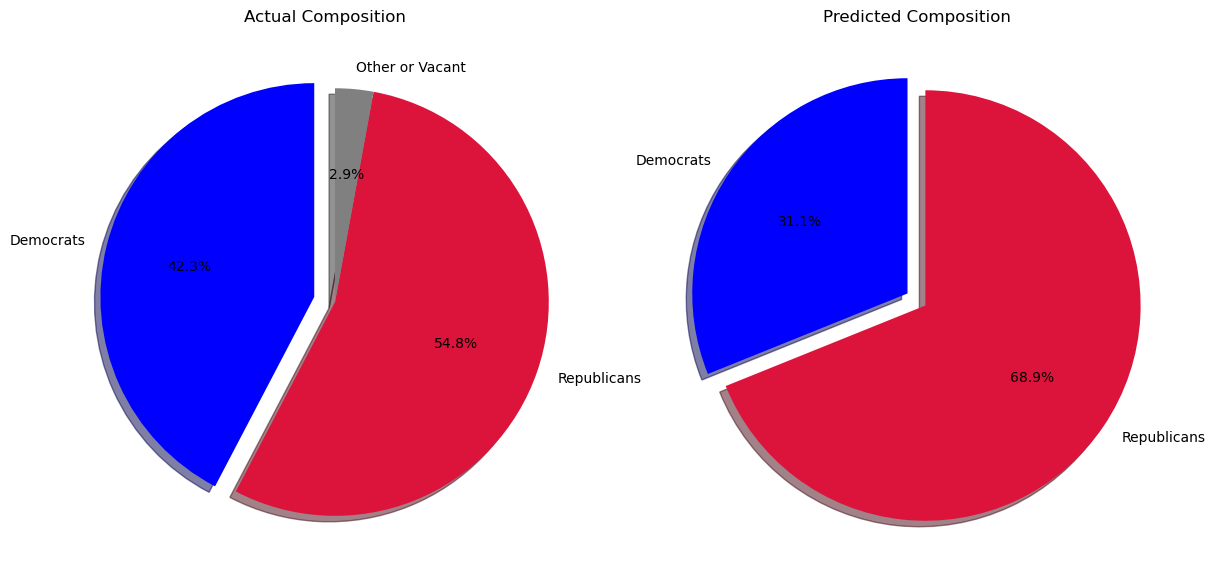

In [86]:
import matplotlib.pyplot as plt

# Extract the 'USA' row for easy access
usa_row = pred_v_actual_sldu[pred_v_actual_sldu['STATE'] == 'USA'].iloc[0]

# Pie chart setup
labels = ['Democrats', 'Republicans', 'Other or Vacant']
actual_sizes = [
    usa_row['Senate Dem'],
    usa_row['Senate GOP'],
    usa_row['Senate other or vacant']
]
predicted_sizes = [
    usa_row['Senate Pred Dem'],
    usa_row['Senate Pred GOP']
]

colors = ['blue', 'crimson', 'grey']
explode = (0.1, 0, 0)  # only "explode" the 1st slice (Democrats)

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Actual Composition Pie Chart
ax[0].pie(actual_sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
          shadow=True, startangle=90)
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0].set_title('Actual Composition')

# Predicted Composition Pie Chart
ax[1].pie(predicted_sizes, explode=explode[:2], labels=labels[:2], colors=colors[:2], autopct='%1.1f%%',
          shadow=True, startangle=90)
ax[1].axis('equal')
ax[1].set_title('Predicted Composition')

plt.show()


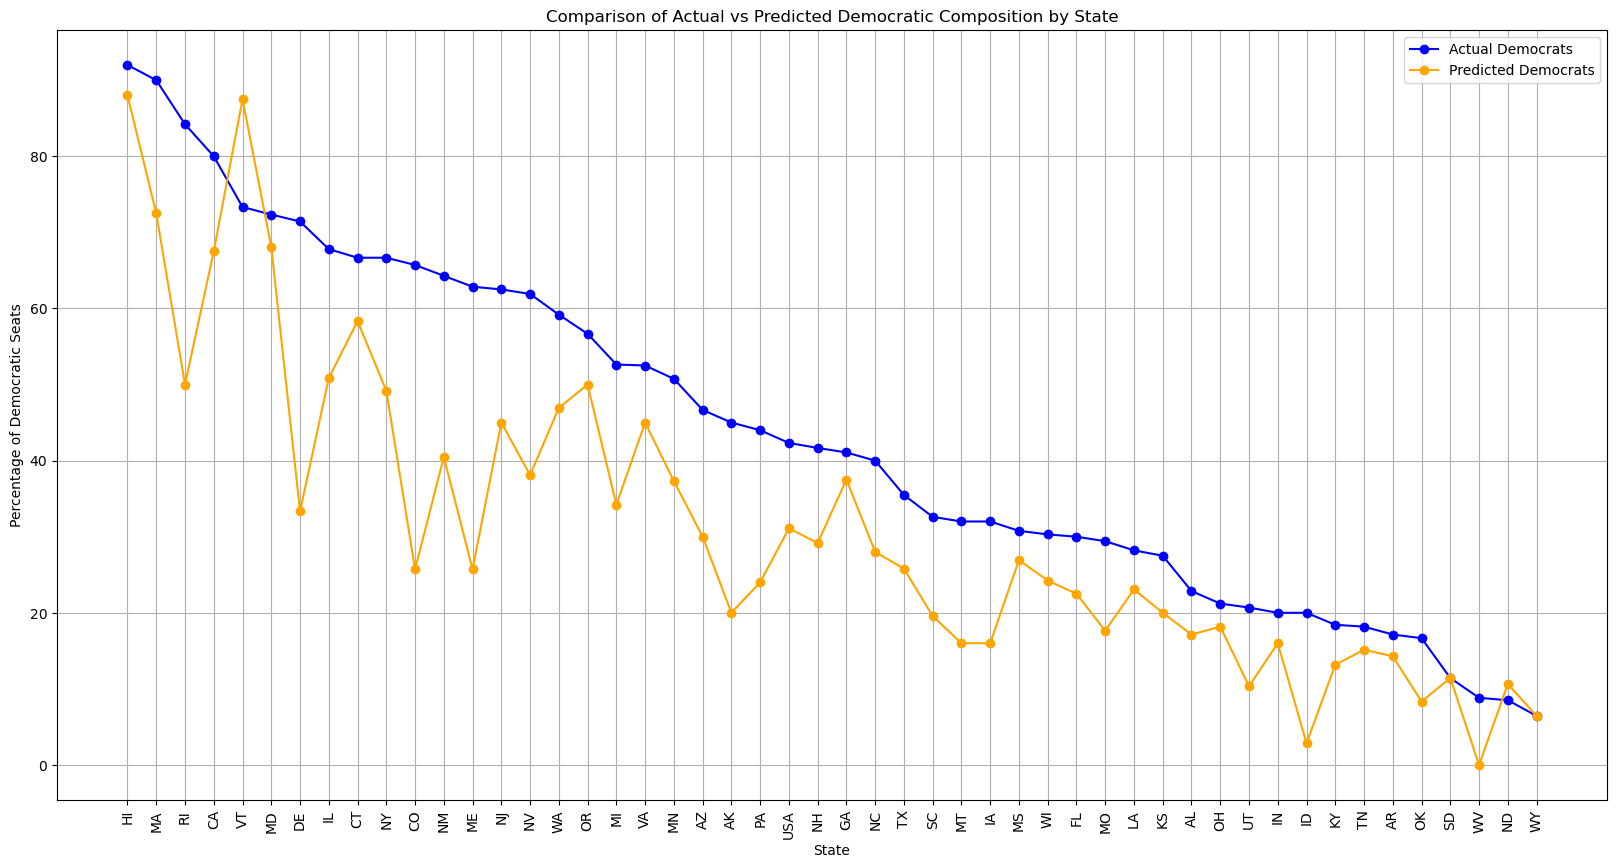

In [87]:
# Sorting the data for the line plot
plot_data_sorted = plot_data_dem.sort_values(by='Pct Actual Dem', ascending=False)

# Creating the connected scatter plot
plt.figure(figsize=(20, 10))
plt.plot(plot_data_sorted['state'], plot_data_sorted['Pct Actual Dem'], 'o-', label='Actual Democrats', color='blue')
plt.plot(plot_data_sorted['state'], plot_data_sorted['Pct Pred Dem'], 'o-', label='Predicted Democrats', color='orange')
plt.xticks(rotation=90)  # Rotate state labels for better visibility
plt.xlabel('State')
plt.ylabel('Percentage of Democratic Seats')
plt.title('Comparison of Actual vs Predicted Democratic Composition by State')
plt.legend()
plt.grid(True)
plt.show()


### With the exception of Vermont and North Dakota, Democrats are being consistently undervalued. 
#### So this could mean a number of things: 
1. My model is terrible and useless... perhaps! But let's not land there quite yet.
2. PVI is calculated by how a district voted for President in the previous 2 presidential elections, so perhaps people are consistently splitting their ticket between how they vote for Pres and how they vote for their state legislators. Maybe, but split-ticketing is more rare these days and I don't imagine too many people voting for Trump then turning around and voting for their Dem state legislator.
3. What I believe to be the case: It has to do with turnout-- state legislators are more often elected in off years and off off years, which are much lower turnout elections. This may be telling me that the composition of the electorate in lower turnout years is more democratic ∴ I should adjust my PVI scores by some number to account for this shift. 

# Shifting the Electorate for State Legislative Elections (Adjusting PVI)

In [127]:
sldu_pvi_df_adjusted = df_pct_merged[["GEOID","PVI","Formatted_District"]].copy()  # Create a copy of the DataFrame
sldu_pvi_df_adjusted['PVI'] = sldu_pvi_df_adjusted['PVI'] + 6.25 #add 6.25 points in the Dems favor


In [89]:
sldu_pvi_df_adjusted['state_fips'] = sldu_pvi_df_adjusted['GEOID'].apply(lambda x: x.split('US')[-1][:2])

# Map FIPS codes to state abbreviations
sldu_pvi_df_adjusted['state'] = sldu_pvi_df_adjusted['state_fips'].map(fips_to_state)

In [90]:
senate_cols = ['STATE', 'Total Senate', 'Senate Dem', 'Senate GOP', 'Senate other or vacant']

ncsl_comp_upper = pd.read_csv('data/SL_composition_3-24.csv', usecols= senate_cols) #only keep upper chamber columns
ncsl_comp_upper.tail()

,STATE,Total Senate,Senate Dem,Senate GOP,Senate other or vacant
46,Washington,49,29.0,20.0,NaN
47,West Virginia,34,3.0,31.0,NaN
48,Wisconsin,33,10.0,22.0,1.0
49,Wyoming,31,2.0,29.0,NaN
50,Total States,1973,835.0,1081.0,57.0


In [91]:
ncsl_comp_upper['STATE'] = ncsl_comp_upper['STATE'].map(states) #map to state codes for merge
ncsl_comp_upper.tail()

,STATE,Total Senate,Senate Dem,Senate GOP,Senate other or vacant
46,WA,49,29.0,20.0,NaN
47,WV,34,3.0,31.0,NaN
48,WI,33,10.0,22.0,1.0
49,WY,31,2.0,29.0,NaN
50,USA,1973,835.0,1081.0,57.0


In [92]:
# Assuming 'PVI' is the column with Partisan Voting Index scores
sldu_pvi_df_adjusted['Senate Pred Dem Adjusted'] = sldu_pvi_df_adjusted['PVI'].apply(lambda x: 1 if x > 0 else 0)
sldu_pvi_df_adjusted['Senate Pred GOP Adjusted'] = sldu_pvi_df_adjusted['PVI'].apply(lambda x: 1 if x < 0 else 0)

In [93]:
# Aggregate the counts by state
state_summary_sldu_adjusted = sldu_pvi_df_adjusted.groupby('state').agg({
    'Senate Pred Dem Adjusted': 'sum',  # Sum of Democratic flags gives number of Dem seats
    'Senate Pred GOP Adjusted': 'sum'   # Sum of Republican flags gives number of GOP seats
})

# Adding a column for the total number of seats predicted because not every legislative district made it through demographics processing 
state_summary_sldu_adjusted['Total Pred Adjusted'] = sldu_pvi_df_adjusted.groupby('state')['state'].count()

In [94]:
state_summary_sldu_adjusted = state_summary_sldu_adjusted.reset_index()

In [95]:
# calculate total predictions in all states and call it USA to match the mapping in the state column for total in the NCSL table
total_counts = state_summary_sldu_adjusted[['Senate Pred Dem Adjusted', 'Senate Pred GOP Adjusted', 'Total Pred Adjusted']].sum()

# Convert Series to  DataFrame and add a 'state' column for concat and eventual merge
total_counts_df = pd.DataFrame([total_counts], index=['USA'])
total_counts_df['state'] = 'USA'  # Explicitly add the 'state' column
total_counts_df.reset_index(drop=True, inplace=True) 

# Concatenate the totals as a new row in the DataFrame
state_summary_sldu_adjusted = pd.concat([state_summary_sldu_adjusted, total_counts_df]) 



In [96]:
pred_v_actual_sldu_adjusted = ncsl_comp_upper.merge(state_summary_sldu_adjusted, left_on = "STATE", right_on= "state", how="left")

In [97]:
pred_v_actual_sldu_adjusted = pred_v_actual_sldu_adjusted.drop(index=26) #dropping Nebraska again

In [98]:
# Calculate percentages for actual and predicted data
pred_v_actual_sldu_adjusted['Pct Actual Dem'] = pred_v_actual_sldu_adjusted['Senate Dem'] / pred_v_actual_sldu_adjusted['Total Senate'] * 100
pred_v_actual_sldu_adjusted['Pct Actual GOP'] = pred_v_actual_sldu_adjusted['Senate GOP'] / pred_v_actual_sldu_adjusted['Total Senate'] * 100
pred_v_actual_sldu_adjusted['Pct Pred Dem Adjusted'] = pred_v_actual_sldu_adjusted['Senate Pred Dem Adjusted'] / pred_v_actual_sldu_adjusted['Total Pred Adjusted'] * 100
pred_v_actual_sldu_adjusted['Pct Pred GOP Adjusted'] = pred_v_actual_sldu_adjusted['Senate Pred GOP Adjusted'] / pred_v_actual_sldu_adjusted['Total Pred Adjusted'] * 100

# percentages of vacant or independent seats where relevant
pred_v_actual_sldu_adjusted['Pct Actual Other'] = pred_v_actual_sldu_adjusted['Senate other or vacant'].fillna(0) / pred_v_actual_sldu_adjusted['Total Senate'] * 100


In [99]:
# Prepare simplified data for plotting
plot_data_dem_adjusted = pred_v_actual_sldu_adjusted[['state', 'Pct Actual Dem', 'Pct Pred Dem Adjusted']]

# Sort values for better readability (optional: sort by actual values or predicted)
plot_data_dem_adjusted = plot_data_dem_adjusted.sort_values('Pct Actual Dem')


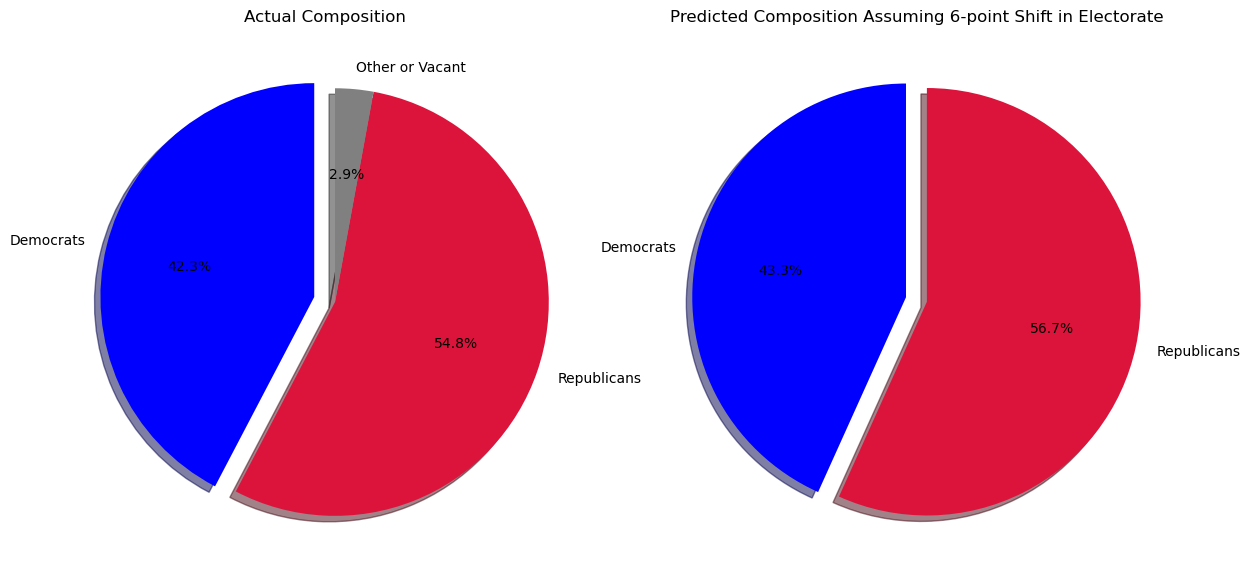

In [100]:
import matplotlib.pyplot as plt

# Extract the 'USA' row for easy access
usa_row = pred_v_actual_sldu_adjusted[pred_v_actual_sldu_adjusted['STATE'] == 'USA'].iloc[0]

# Pie chart setup
labels = ['Democrats', 'Republicans', 'Other or Vacant']
actual_sizes = [
    usa_row['Senate Dem'],
    usa_row['Senate GOP'],
    usa_row['Senate other or vacant']
]
predicted_sizes = [
    usa_row['Senate Pred Dem Adjusted'],
    usa_row['Senate Pred GOP Adjusted']
]

colors = ['blue', 'crimson', 'grey']
explode = (0.1, 0, 0)  # only "explode" the 1st slice (Democrats)

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Actual Composition Pie Chart
ax[0].pie(actual_sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
          shadow=True, startangle=90)
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0].set_title('Actual Composition')

# Predicted Composition Pie Chart
ax[1].pie(predicted_sizes, explode=explode[:2], labels=labels[:2], colors=colors[:2], autopct='%1.1f%%',
          shadow=True, startangle=90)
ax[1].axis('equal')
ax[1].set_title('Predicted Composition Assuming 6-point Shift in Electorate')

plt.show()


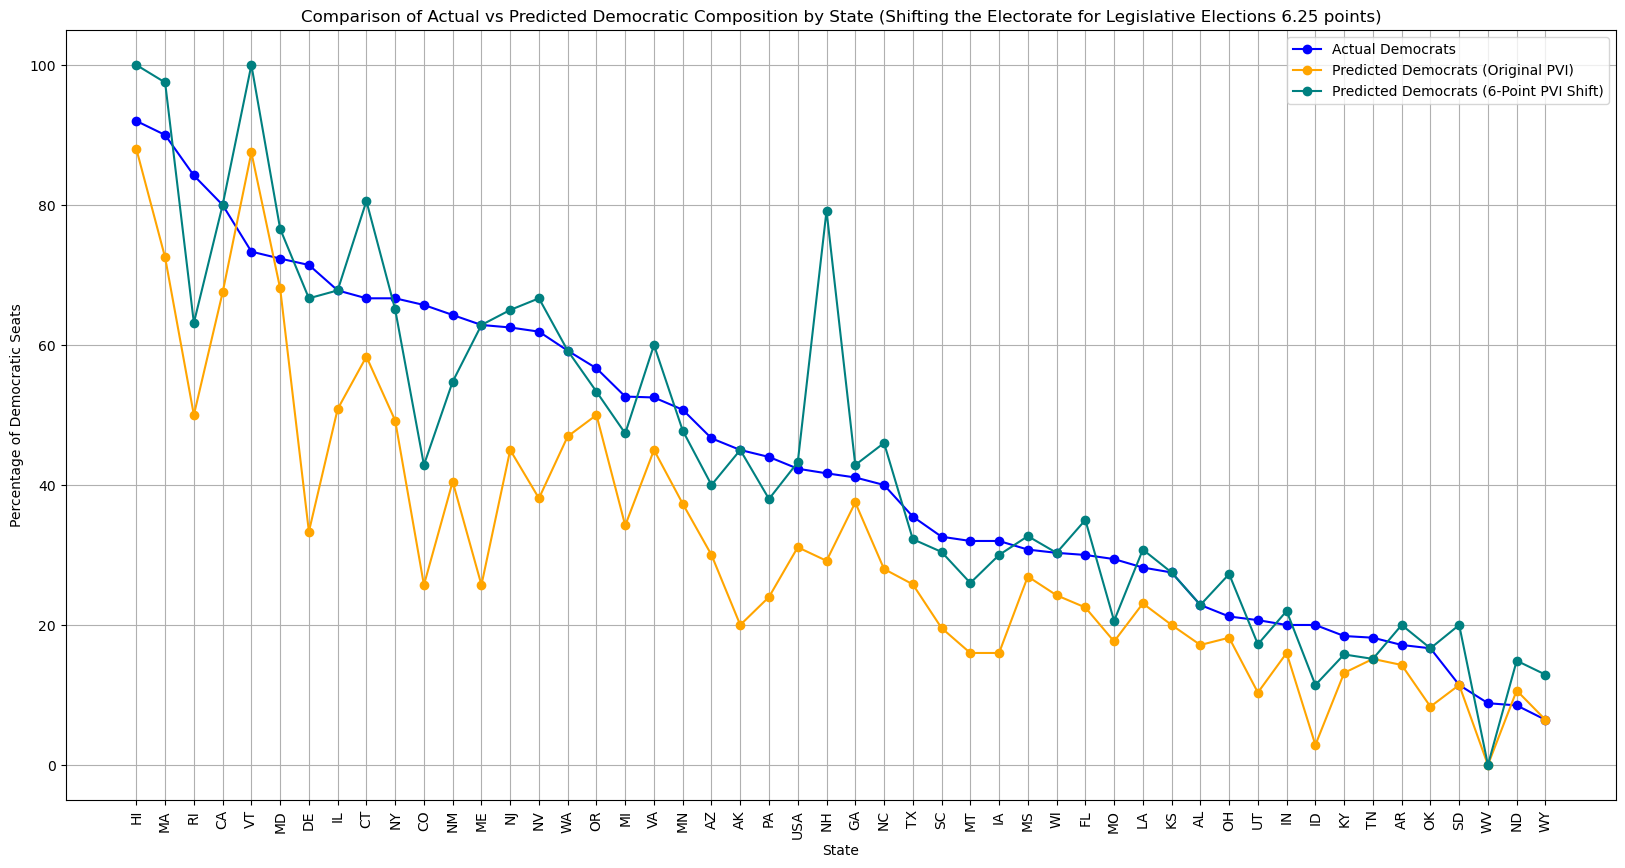

In [119]:
# Sorting the data for the line plot
plot_data_sorted_adjusted = plot_data_dem_adjusted.sort_values(by='Pct Actual Dem', ascending=False)

# Creating the connected scatter plot
plt.figure(figsize=(20, 10))
plt.plot(plot_data_sorted['state'], plot_data_sorted['Pct Actual Dem'], 'o-', label='Actual Democrats', color='blue')
plt.plot(plot_data_sorted['state'], plot_data_sorted['Pct Pred Dem'], 'o-', label='Predicted Democrats (Original PVI)', color='orange')
plt.plot(plot_data_sorted['state'], plot_data_sorted_adjusted['Pct Pred Dem Adjusted'], 'o-', label='Predicted Democrats (6-Point PVI Shift)', color='teal')
plt.xticks(rotation=90)  # Rotate state labels for better visibility
plt.xlabel('State')
plt.ylabel('Percentage of Democratic Seats')
plt.title('Comparison of Actual vs Predicted Democratic Composition by State (Shifting the Electorate for Legislative Elections 6.25 points)')
plt.legend()
plt.grid(True)
plt.show()


In [102]:
# Calculate the absolute differences
pred_v_actual_sldu['Diff Original'] = (pred_v_actual_sldu['Pct Actual Dem'] - pred_v_actual_sldu['Pct Pred Dem']).abs()
pred_v_actual_sldu['Diff Adjusted'] = (pred_v_actual_sldu['Pct Actual Dem'] - pred_v_actual_sldu_adjusted['Pct Pred Dem Adjusted']).abs()

# Sort the data for plotting
sorted_original = pred_v_actual_sldu[['STATE', 'Diff Original']].sort_values('Diff Original', ascending=False)
sorted_adjusted = pred_v_actual_sldu[['STATE', 'Diff Adjusted']].sort_values('Diff Adjusted', ascending=False)

# Ensure a consistent order by re-indexing
sorted_original['order'] = range(len(sorted_original))
sorted_adjusted['order'] = range(len(sorted_adjusted))


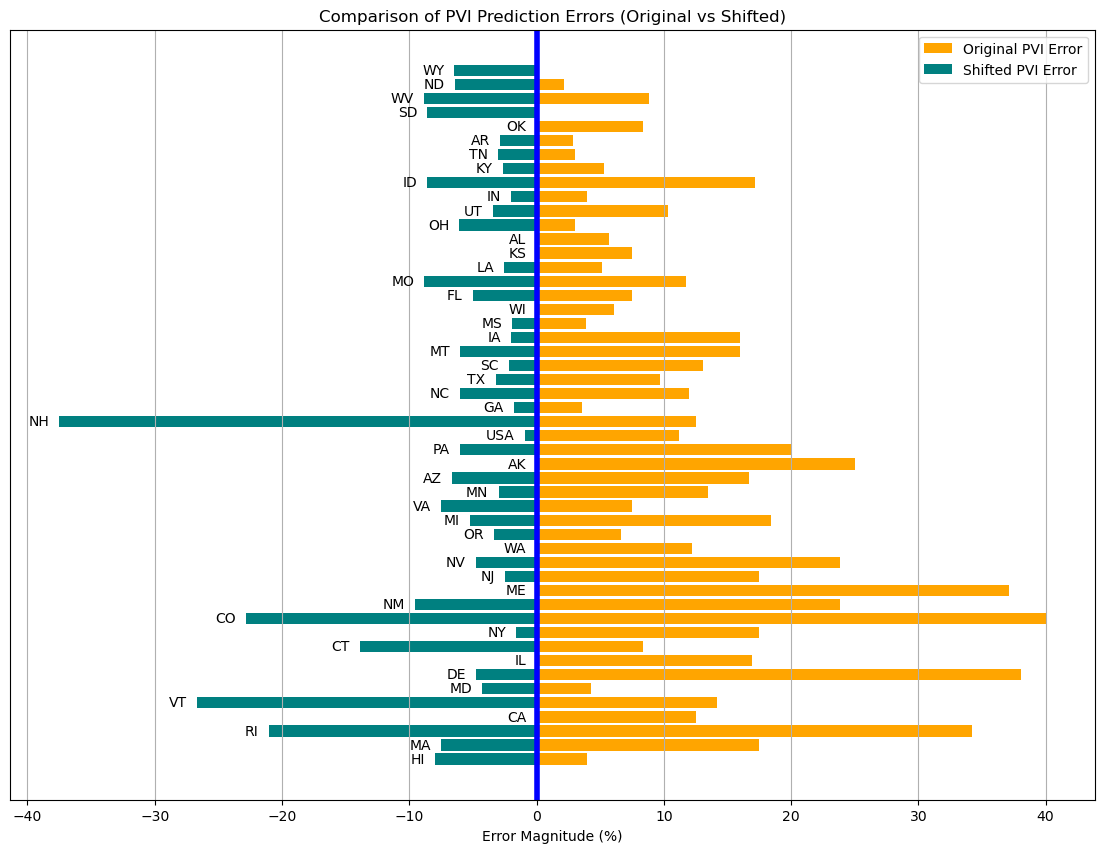

In [103]:
import matplotlib.pyplot as plt

# Assuming pred_v_actual_sldu is the main DataFrame
# Sorting the data by 'Pct Actual Dem' as used in the scatter plot
pred_v_actual_sldu_sorted = pred_v_actual_sldu.sort_values(by='Pct Actual Dem', ascending=False)

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(14, 10))

# Plotting the original and adjusted PVI errors using the sorted data
ax.barh(pred_v_actual_sldu_sorted['STATE'], pred_v_actual_sldu_sorted['Diff Original'], color='orange', label='Original PVI Error')
ax.barh(pred_v_actual_sldu_sorted['STATE'], -pred_v_actual_sldu_sorted['Diff Adjusted'], color='teal', label='Shifted PVI Error')

# Adding labels to the error bars, placed outside the bars
buffer_space = max(pred_v_actual_sldu_sorted['Diff Original'].max(), pred_v_actual_sldu_sorted['Diff Adjusted'].max()) * 0.02  # Dynamic spacing
for i, state in enumerate(pred_v_actual_sldu_sorted['STATE']):
    # ax.text(pred_v_actual_sldu_sorted['Diff Original'].iloc[i] + buffer_space, i, state, va='center', ha='left', color='black')
    ax.text(-pred_v_actual_sldu_sorted['Diff Adjusted'].iloc[i] - buffer_space, i, state, va='center', ha='right', color='black')

# Setting labels and titles
ax.set_xlabel('Error Magnitude (%)')
ax.set_yticks([])  # Hide y-axis ticks
ax.set_title('Comparison of PVI Prediction Errors (Original vs Shifted)')
ax.legend()

# Drawing a thick blue vertical line at x=0 to visually separate the sides
ax.axvline(0, color='blue', linewidth=4)

# Show grid and the plot
ax.grid(True)
plt.show()



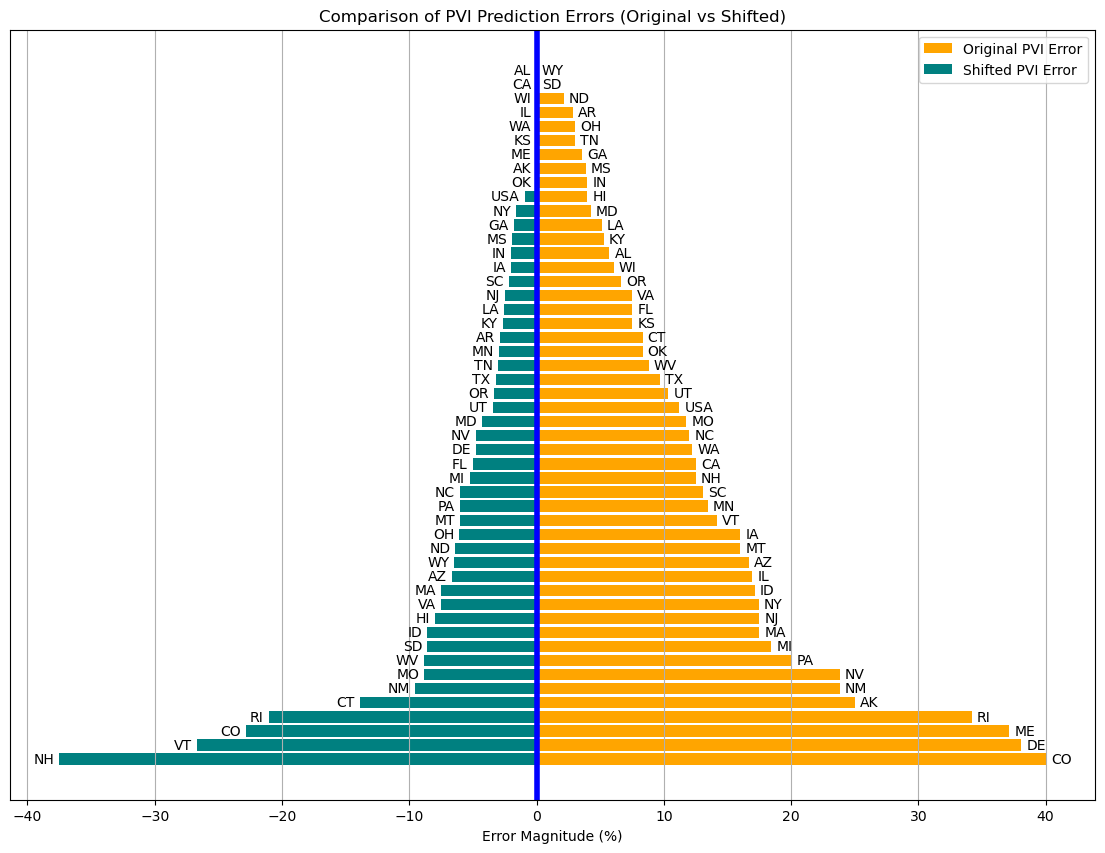

In [104]:
import matplotlib.pyplot as plt

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(14, 10))

# Plotting the original and adjusted PVI errors
ax.barh(sorted_original['order'], sorted_original['Diff Original'], color='orange', label='Original PVI Error')
ax.barh(sorted_adjusted['order'], -sorted_adjusted['Diff Adjusted'], color='teal', label='Shifted PVI Error')

# Adding labels to the error bars, placed outside the bars
buffer_space = max(sorted_original['Diff Original'].max(), sorted_adjusted['Diff Adjusted'].max()) * 0.01  # Dynamic spacing
for i in range(len(sorted_original)):
    ax.text(sorted_original['Diff Original'].iloc[i] + buffer_space, i, sorted_original['STATE'].iloc[i], va='center', ha='left', color='black')
for i in range(len(sorted_adjusted)):
    ax.text(-sorted_adjusted['Diff Adjusted'].iloc[i] - buffer_space, i, sorted_adjusted['STATE'].iloc[i], va='center', ha='right', color='black')

# Setting labels and titles
ax.set_xlabel('Error Magnitude (%)')
ax.set_yticks([])  # Hide y-axis ticks
ax.set_title('Comparison of PVI Prediction Errors (Original vs Shifted)')
ax.legend()

# Drawing a thick blue vertical line at x=0 to visually separate the sides
ax.axvline(0, color='blue', linewidth=4)

# Show grid and the plot
ax.grid(True)
plt.show()


# Ok, I'm satisfied. Print and map this in QGIS

In [131]:
# Extract state FIPS codes as a new column
sldu_pvi_df_adjusted['state_fips'] = sldu_pvi_df_adjusted['GEOID'].apply(lambda x: x.split('US')[-1][:2])

# Map FIPS codes to state abbreviations
sldu_pvi_df_adjusted['state'] = sldu_pvi_df_adjusted['state_fips'].map(fips_to_state)


In [132]:
sldu_pvi_df_adjusted

,GEOID,PVI,Formatted_District,state_fips,state
0,610U800US0200A,-9.685082,"State Senate District A (2022), Alaska",02,AK
1,610U800US0200B,6.186881,"State Senate District B (2022), Alaska",02,AK
2,610U800US0200C,-3.191946,"State Senate District C (2022), Alaska",02,AK
3,610U800US0200D,-22.635338,"State Senate District D (2022), Alaska",02,AK
4,610U800US0200E,4.823058,"State Senate District E (2022), Alaska",02,AK
...,...,...,...,...,...
1937,610U800US56027,-19.618507,WY-Sen-27,56,WY
1938,610U800US56028,-6.136257,WY-Sen-28,56,WY
1939,610U800US56029,-21.989387,WY-Sen-29,56,WY
1940,610U800US56030,-37.609809,WY-Sen-30,56,WY


In [133]:
sldu_pvi_df_adjusted.to_csv('data/sldu_pvi_adjusted.csv')

# Assess predicted PVI performance on a test state (North Carolina's) upper chamber
### Races are won in the margins-- someone who runs a great campaign will perform better in certain races in certain districts, I wanted to compare actual representatives to their predicted partisan score

In [203]:
nc_sens = pd.read_csv('data/NCGA_Sen.csv')

In [204]:
nc_sens['District'].dtype

dtype('int64')

In [205]:
df_pct_merged[['Formatted_District', 'GEOID', 'PVI']]

# Prepare PVI data for NC
nc_filtered = df_pct_merged[df_pct_merged['Formatted_District'].str.startswith('NC')]
nc_pvi = nc_filtered[['GEOID', 'Formatted_District', 'PVI']].rename(columns={
    'PVI': 'pred_PVI',  # Ensure this is within 10 characters
    'Formatted_District': 'district'  # Ensure this is within 10 characters
})

In [206]:
nc_pvi['District_Number'] = nc_pvi['district'].str.split('Sen-').str[1].astype(int)

In [207]:
# Assuming the shift of 6.25 points
nc_pvi['pred_PVI_shifted'] = nc_pvi['pred_PVI'] + 6.25


In [208]:
nc_pvi['predicted_party'] = np.where(nc_pvi['pred_PVI_shifted'] > 0, 'Democratic', 'Republican')


In [209]:
nc_pvi.columns

Index(['GEOID', 'district', 'pred_PVI', 'District_Number', 'pred_PVI_shifted',
       'predicted_party'],
      dtype='object')

In [210]:
nc_sens_pvi_df = nc_pvi.merge(nc_sens, left_on='District_Number', right_on='District', how='left')

In [211]:
nc_sens_pvi_df

,GEOID,district,pred_PVI,District_Number,pred_PVI_shifted,predicted_party,Party,District,Member,Counties Represented
0,610U800US37001,NC-Sen-01,-19.280423,1,-13.030423,Republican,R,1,Norman W. Sanderson,"Carteret, Chowan, Dare, Hyde, Pamlico, Pasquotank, Perquimans, Washington"
1,610U800US37002,NC-Sen-02,-10.854440,2,-4.604440,Republican,R,2,Jim Perry,"Beaufort, Craven, Lenoir"
2,610U800US37003,NC-Sen-03,-4.840893,3,1.409107,Democratic,R,3,Bobby Hanig,"Bertie, Camden, Currituck, Gates, Halifax, Hertford, Martin, Northampton, Tyrrell, Warren"
3,610U800US37004,NC-Sen-04,-6.718213,4,-0.468213,Republican,R,4,Buck Newton,"Greene, Wayne, Wilson"
4,610U800US37005,NC-Sen-05,6.734699,5,12.984699,Democratic,D,5,Kandie D. Smith,"Edgecombe, Pitt"
5,610U800US37006,NC-Sen-06,-19.080914,6,-12.830914,Republican,R,6,Michael A. Lazzara,Onslow
6,610U800US37007,NC-Sen-07,-2.557613,7,3.692387,Democratic,R,7,Michael V. Lee,New Hanover
7,610U800US37008,NC-Sen-08,-15.614870,8,-9.364870,Republican,R,8,Bill Rabon,"Brunswick, Columbus, New Hanover"
8,610U800US37009,NC-Sen-09,-15.626561,9,-9.376561,Republican,R,9,Brent Jackson,"Bladen, Duplin, Jones, Pender, Sampson"
9,610U800US37010,NC-Sen-10,-19.624622,10,-13.374622,Republican,R,10,Benton G. Sawrey,Johnston


In [212]:
sorted_nc_pvi = nc_sens_pvi_df.sort_values(by='pred_PVI', ascending=True)
sorted_nc_pvi[["GEOID","pred_PVI","pred_PVI_shifted","district","Party", "predicted_party","Member", "Counties Represented"]]

,GEOID,pred_PVI,pred_PVI_shifted,district,Party,predicted_party,Member,Counties Represented
35,610U800US37036,-31.169909,-24.919909,NC-Sen-36,R,Republican,Eddie D. Settle,"Alexander, Surry, Wilkes, Yadkin"
43,610U800US37044,-26.506825,-20.256825,NC-Sen-44,R,Republican,W. Ted Alexander,"Cleveland, Gaston, Lincoln"
29,610U800US37030,-26.112223,-19.862223,NC-Sen-30,R,Republican,Steve Jarvis,"Davidson, Davie"
44,610U800US37045,-25.798338,-19.548338,NC-Sen-45,R,Republican,Dean Proctor,"Caldwell, Catawba"
32,610U800US37033,-23.413607,-17.163607,NC-Sen-33,R,Republican,Carl Ford,"Rowan, Stanly"
49,610U800US37050,-22.789365,-16.539365,NC-Sen-50,R,Republican,Kevin Corbin,"Cherokee, Clay, Graham, Haywood, Jackson, Macon, Swain, Transylvania"
47,610U800US37048,-22.351541,-16.101541,NC-Sen-48,R,Republican,Timothy D. Moffitt,"Henderson, Polk, Rutherford"
45,610U800US37046,-20.301126,-14.051126,NC-Sen-46,R,Republican,Warren Daniel,"Buncombe, Burke, McDowell"
46,610U800US37047,-20.294515,-14.044515,NC-Sen-47,R,Republican,Ralph Hise,"Alleghany, Ashe, Avery, Caldwell, Haywood, Madison, Mitchell, Watauga, Yancey"
9,610U800US37010,-19.624622,-13.374622,NC-Sen-10,R,Republican,Benton G. Sawrey,Johnston


In [213]:
def classify_competitiveness(pvi):
    if pvi > 20:
        return "Super Solid D"
    elif 12 < pvi <= 20:
        return "Solid D"
    elif 6 < pvi <= 12:
        return "Likely D"
    elif 2 <= pvi <= 6:
        return "Tilt D"
    elif -2 <= pvi <= 2:
        return "Toss Up"
    elif -6 <= pvi <= -2:
        return "Tilt R"
    elif -12 <= pvi < -6:
        return "Likely R"
    elif -20 <= pvi < -12:
        return "Solid R"
    else:
        return "Super Solid R"

nc_sens_pvi_df['competitiveness'] = nc_sens_pvi_df['pred_PVI_shifted'].apply(classify_competitiveness)


In [214]:
nc_sens_pvi_df

,GEOID,district,pred_PVI,District_Number,pred_PVI_shifted,predicted_party,Party,District,Member,Counties Represented,competitiveness
0,610U800US37001,NC-Sen-01,-19.280423,1,-13.030423,Republican,R,1,Norman W. Sanderson,"Carteret, Chowan, Dare, Hyde, Pamlico, Pasquotank, Perquimans, Washington",Solid R
1,610U800US37002,NC-Sen-02,-10.854440,2,-4.604440,Republican,R,2,Jim Perry,"Beaufort, Craven, Lenoir",Tilt R
2,610U800US37003,NC-Sen-03,-4.840893,3,1.409107,Democratic,R,3,Bobby Hanig,"Bertie, Camden, Currituck, Gates, Halifax, Hertford, Martin, Northampton, Tyrrell, Warren",Toss Up
3,610U800US37004,NC-Sen-04,-6.718213,4,-0.468213,Republican,R,4,Buck Newton,"Greene, Wayne, Wilson",Toss Up
4,610U800US37005,NC-Sen-05,6.734699,5,12.984699,Democratic,D,5,Kandie D. Smith,"Edgecombe, Pitt",Solid D
5,610U800US37006,NC-Sen-06,-19.080914,6,-12.830914,Republican,R,6,Michael A. Lazzara,Onslow,Solid R
6,610U800US37007,NC-Sen-07,-2.557613,7,3.692387,Democratic,R,7,Michael V. Lee,New Hanover,Tilt D
7,610U800US37008,NC-Sen-08,-15.614870,8,-9.364870,Republican,R,8,Bill Rabon,"Brunswick, Columbus, New Hanover",Likely R
8,610U800US37009,NC-Sen-09,-15.626561,9,-9.376561,Republican,R,9,Brent Jackson,"Bladen, Duplin, Jones, Pender, Sampson",Likely R
9,610U800US37010,NC-Sen-10,-19.624622,10,-13.374622,Republican,R,10,Benton G. Sawrey,Johnston,Solid R


In [215]:
nc_sens_pvi_df.to_csv('data/nc_pvi.csv')

## Just because I'm curious, let's see the PVI distributions in GOP-Gerrymandered states

In [134]:
# Define the control mapping
control_mapping = {
    # GOP Redistricting states
    'AL': 'GOP Redistricting', 'AR': 'GOP Redistricting', 'FL': 'GOP Redistricting', 'GA': 'GOP Redistricting',
    'IN': 'GOP Redistricting', 'IA': 'GOP Redistricting', 'KS': 'GOP Redistricting', 'KY': 'GOP Redistricting',
    'LA': 'GOP Redistricting', 'MS': 'GOP Redistricting', 'MO': 'GOP Redistricting', 'NE': 'GOP Redistricting',
    'OH': 'GOP Redistricting', 'OK': 'GOP Redistricting', 'SC': 'GOP Redistricting', 'TN': 'GOP Redistricting',
    'TX': 'GOP Redistricting', 'UT': 'GOP Redistricting', 'WV': 'GOP Redistricting',

    # Democratic Redistricting states
    'IL': 'Democratic Redistricting', 'MD': 'Democratic Redistricting', 'MA': 'Democratic Redistricting',
    'NM': 'Democratic Redistricting', 'NV': 'Democratic Redistricting', 'OR': 'Democratic Redistricting', 'RI': 'Democratic Redistricting',

    # Split-Party Redistricting
    'ME': 'Split-Party Redistricting',

    # Courts
    'CT': 'Courts', 'MN': 'Courts', 'NC': 'Courts', 'NH': 'Courts',
    'NY': 'Courts', 'PA': 'Courts', 'VA': 'Courts', 'WI': 'Courts',

    # Independent Commission
    'AZ': 'Independent Commission', 'CA': 'Independent Commission', 'CO': 'Independent Commission', 'MI': 'Independent Commission',

    # Political Commission
    'HI': 'Political Commission', 'ID': 'Political Commission', 'MT': 'Political Commission', 'NJ': 'Political Commission', 'WA': 'Political Commission',

    # At-Large State
    'AK': 'At-Large State', 'DE': 'At-Large State', 'ND': 'At-Large State', 'SD': 'At-Large State',
    'VT': 'At-Large State', 'WY': 'At-Large State',
}


# Function to determine control type and append district to appropriate list
def categorize_districts(district):
    state_abbr = district.split('-')[0]  # Extract the state abbreviation from the district string
    control_type = control_mapping.get(state_abbr, 'Other')  # Get the control type from the dictionary or default to 'Other'
    
    if control_type == 'GOP Redistricting':
        gop_controlled.append(district)
    elif control_type == 'Democratic Redistricting':
        democratic_controlled.append(district)
    elif control_type == 'Split-Party Redistricting':
        split_control.append(district)
    elif control_type == 'Courts':
        Courts_drawn.append(district)
    elif control_type == 'Independent Commission':
        independent_commission.append(district)
    elif control_type == 'Political Commission':
        political_commission.append(district)
    elif control_type == 'At-Large State':
        at_large_state.append(district)
    else:
        print(f"No match found for {state_abbr}")  # Print when the state abbreviation doesn't match any key in the control_mapping

# Lists to hold districts based on control type
gop_controlled = []
democratic_controlled = []
split_control = []
Courts_drawn = []
independent_commission = []
political_commission = []
at_large_state = []

# Iterate over the DataFrame and categorize each district
sldu_pvi_df_adjusted['state'].apply(categorize_districts)

# Print out the counts for each list as a check
print(f'GOP Redistricting: {len(gop_controlled)} districts')
print(f'Democratic Redistricting: {len(democratic_controlled)} districts')
print(f'Split-Party Redistricting: {len(split_control)} districts')
print(f'Courts: {len(Courts_drawn)} districts')
print(f'Independent Commission: {len(independent_commission)} districts')
print(f'Political Commission: {len(political_commission)} districts')
print(f'At-Large State: {len(at_large_state)} districts')


GOP Redistricting: 755 districts
Democratic Redistricting: 277 districts
Split-Party Redistricting: 35 districts
Courts: 363 districts
Independent Commission: 143 districts
Political Commission: 199 districts
At-Large State: 170 districts


In [141]:


# Create a new column 'Redistricting Type' by applying the function to each district
sldu_pvi_df_adjusted['Redistricting Type'] = sldu_pvi_df_adjusted['state'].map(control_mapping)


In [142]:
sldu_pvi_df_adjusted

,GEOID,PVI,Formatted_District,state_fips,state,Redistricting Type
0,610U800US0200A,-9.685082,"State Senate District A (2022), Alaska",02,AK,At-Large State
1,610U800US0200B,6.186881,"State Senate District B (2022), Alaska",02,AK,At-Large State
2,610U800US0200C,-3.191946,"State Senate District C (2022), Alaska",02,AK,At-Large State
3,610U800US0200D,-22.635338,"State Senate District D (2022), Alaska",02,AK,At-Large State
4,610U800US0200E,4.823058,"State Senate District E (2022), Alaska",02,AK,At-Large State
...,...,...,...,...,...,...
1937,610U800US56027,-19.618507,WY-Sen-27,56,WY,At-Large State
1938,610U800US56028,-6.136257,WY-Sen-28,56,WY,At-Large State
1939,610U800US56029,-21.989387,WY-Sen-29,56,WY,At-Large State
1940,610U800US56030,-37.609809,WY-Sen-30,56,WY,At-Large State


In [149]:
#Republican gerrymandering based on Congressional Districts so doesn't have all states (specifically, 
gop_gerrymander_df = sldu_pvi_df_adjusted[sldu_pvi_df_adjusted['Redistricting Type'] == 'GOP Redistricting']


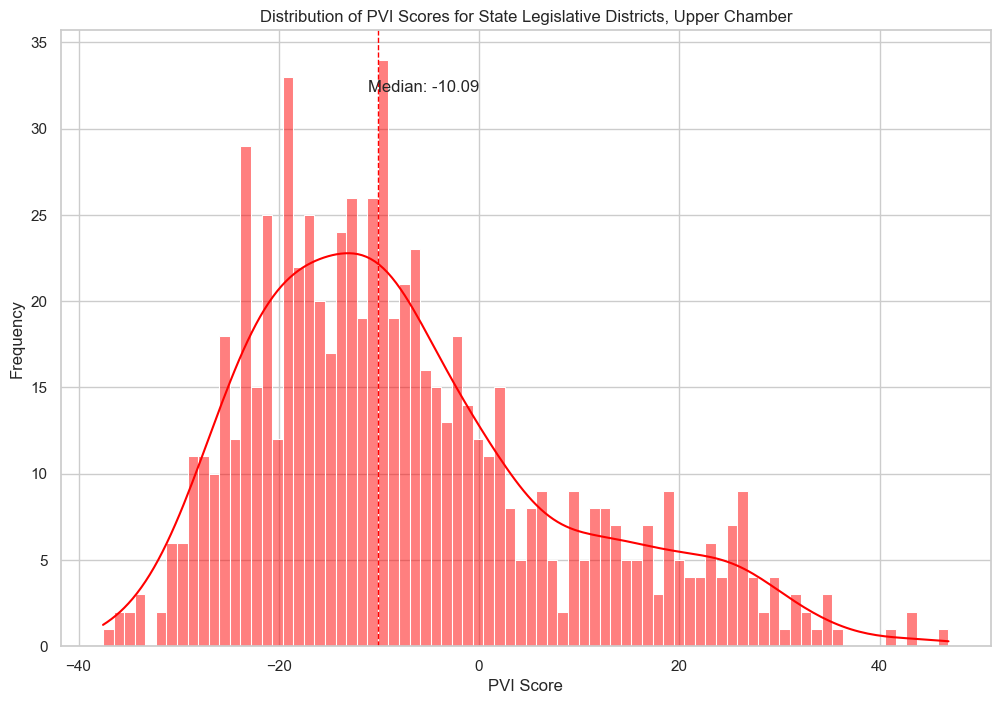

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style='whitegrid')

# Create the histogram
plt.figure(figsize=(12, 8))
sns.histplot(gop_gerrymander_df['PVI'], bins=80, kde=True, color='red')

# Adding aesthetics
plt.title('Distribution of PVI Scores for State Legislative Districts, Upper Chamber')
plt.xlabel('PVI Score')
plt.ylabel('Frequency')
plt.axvline(gop_gerrymander_df['PVI'].median(), color='red', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(gop_gerrymander_df['PVI'].median()*1.1, max_ylim*0.9, 'Median: {:.2f}'.format(gop_gerrymander_df['PVI'].median()))

# Save the figure to a file
plt.savefig('Composite_PVI_Scores_Distribution_by_Redistricting_Type_2023.png', dpi=300)

# Display the plot
plt.show()


In [156]:
# Filtering for tossup districts with PVI between -6 and 6
tossup_districts_count = gop_gerrymander_df[(gop_gerrymander_df['PVI'] >= -2) & (gop_gerrymander_df['PVI'] <= 2)].shape[0]

print(f"Number of tossup districts in GOP gerrymandered areas: {tossup_districts_count}")


Number of tossup districts in GOP gerrymandered areas: 53
